In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import phik
from pandas.api.types import is_numeric_dtype
from sklearn.compose import ColumnTransformer
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    mean_absolute_error,
    mean_squared_error,
    precision_score,
    recall_score,
    r2_score,
    root_mean_squared_error,
)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Ход работы

## Определение вспомогательных функций

### Вывод качества данных

In [1247]:
def get_column_stats(data):
    '''
    Вывод информации о пропусках, дубликатах, типах данных
    '''
    
    stats = pd.DataFrame({
        'Тип данных': data.dtypes,
        'Пропуски': data.isna().sum()
    })
    
    return stats

### Построение графиков для статистического анализа

In [1248]:
def plotting_stat_graphs(data) -> None:
    '''
    Построение графиков для статистического анализа
    Для численных столбцов строится гистограмма и ящик с усами, 
    для остальных - барплот и круговая диаграмма
    '''
    if isinstance(data, pd.DataFrame):
        numeric_cols = data.select_dtypes(include=['number']).columns
        non_numeric_cols = data.select_dtypes(exclude=['number']).columns

        for col in numeric_cols:
            plt.figure(figsize=(12, 5))
            
            plt.subplot(1, 2, 1)
            sns.histplot(data[col], kde=True, bins=50)
            plt.title(f'Гистограмма для {col}')
            
            plt.subplot(1, 2, 2)
            sns.boxplot(x=data[col])
            plt.title(f'Боксплот для {col}')
            
            plt.tight_layout()
            plt.show()
    
        for col in non_numeric_cols:
            plt.figure(figsize=(12, 5))

            plt.subplot(1, 2, 1)
            sns.countplot(y=col, data=data, order=data[col].value_counts().index)
            plt.title(f'Барплот для {col}')

            plt.subplot(1, 2, 2)
            plt.pie(
                data[col].value_counts(),
                labels=data[col].value_counts().index,
                autopct='%1.2f%%',
                startangle=90
            )
            plt.title(f'Распределение {data[col].shape[0]} значений {col}')

            plt.tight_layout()
            plt.show()

    elif isinstance(data, pd.Series):
        if is_numeric_dtype(data):
            plt.figure(figsize=(12, 5))
            
            plt.subplot(1, 2, 1)
            sns.histplot(data, kde=True, bins=50)
            plt.title(f'Гистограмма для {data.name}')
            
            plt.subplot(1, 2, 2)
            sns.boxplot(x=data)
            plt.title(f'Боксплот для {data.name}')
            
            plt.tight_layout()
            plt.show()
        else:
            plt.figure(figsize=(12, 5))

            plt.subplot(1, 2, 1)
            sns.countplot(x=data, order=data.value_counts().index)
            plt.title(f'Барплот для {data.name}')

            plt.subplot(1, 2, 2)
            plt.pie(
                data.value_counts(),
                labels=data.value_counts().index,
                autopct='%1.2f%%',
                startangle=90
            )
            plt.title(f'Распределение {data.shape[0]} значений {data.name}')

            plt.tight_layout()
            plt.show()

    else:
        print('Неверный формат входных данных')
    

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Ошибка:

Вылетает ошибка     
    
    TypeError: unsupported operand type(s) for |: 'type' and 'type'


    
Стоит перед отправкой проекта перезапустить ядро и выполнить все ячейки – так можно проверить, что код работает:
    
<img src='https://jing.yandex-team.ru/files/aslvova/Screenshot%202022-05-31%20at%2011.08.40.png' alt='restart_kernel_and_run_all' width='400'>

Не знаю какая картинка откроется...

![](https://i.postimg.cc/yd19rYf6/Screenshot-428.png)





<div class="alert alert-warning">
 


Совет 🤔:
 
    
    
Тут стоит ориентироваться на версии библиотек используемые в тренажёре, а ты похоже использовал     Python 3.10+

<div class="alert alert-info"> <b>Комментарии студентаV2:</b> Исправлено. Да, я использовал синтаксис, введенный в версии 3.10 </div>

### Построение диаграмм рассеяния с учетом категориальных признаков

In [1249]:
def plot_scatter_with_categories(
    data: pd.DataFrame,
    category_column: str,
    x_column = None,
    y_column = None,
    alpha = 1,
    figsize = (10, 6)
) -> None:
    '''
    Построение диаграммы рассеяния с цветовым кодированием по категориям.
    '''
    if not y_column:
        y_column = 'milk_yield_kg'

    if x_column:
        # Create a single scatter plot
        plt.figure(figsize=figsize)
        scatter = sns.scatterplot(
            data=data,
            x=x_column,
            y=y_column,
            hue=category_column,
            alpha=alpha,
            s=5,
            palette='bright'
        )
        scatter.set_title(f'{y_column}({x_column}) by {category_column}')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
    else:
        numeric_cols = data.select_dtypes(include=["number"]).columns.tolist()
        x_columns = [col for col in numeric_cols if col != 'id']    
        n_y = len(x_columns)
        
        rows = (n_y + 2) // 3
        fig, axes = plt.subplots(rows, 3, figsize=(12, 3.5*rows))
        axes_flat = np.ravel(axes)
        
        for i, x_col in enumerate(x_columns):
            ax = axes_flat[i]
            sns.scatterplot(
                data=data,
                x=x_col,
                y=y_column,  
                hue=category_column,
                alpha=alpha,
                ax=ax,
                legend=True,
                s=5,
                palette='bright'    
            )
            ax.set_xlabel(x_col)
            ax.grid(True, alpha=0.3)
            ax.legend_.remove()

        for j in range(i + 1, len(axes_flat)):
            axes_flat[j].axis('off')

        handles, labels = axes_flat[0].get_legend_handles_labels()
        fig.legend(handles, labels, title=category_column, 
                    loc='upper right', bbox_to_anchor=(1.16, 0.9))
        
        fig.subplots_adjust(top=0.9)
        fig.suptitle(f'Диаграммы рассеяния с раскрашиванием ' +\
                     f'по {category_column}')
        
        plt.tight_layout()
        plt.show()

### Преобразование данных

In [ ]:
def data_preparing(
        data: pd.DataFrame,
        target_column: str,
        test_size: int = 0.2,
        random_state: int = 42
):
    '''
    Разбиение данных на тестовую и тренировочную части с кодированием категориальных признаков Ohe и стандартизации StandardScaler
    '''
    print('Выбор целевого признака')
    print(f'\tЦелевой признак: {target_column}')
    
    X = data.drop(columns=[target_column], axis=1)
    y = data[target_column]

    print(f'\tX.shape = {X.shape}')
    print(f'\ty.shape = {y.shape}')
    print()
    print('Разбиение на тестовую и тренировочную подвыборки')

    X_train, X_test, y_train, y_test = train_test_split(
        X, 
        y, 
        test_size=test_size, 
        random_state=random_state
    )

    print()
    print('Разбиение на категориальные и количественные признаки')
    categorical_cols = (
        X
        .select_dtypes(include=['object', 'category', 'bool'])
        .columns
        .tolist()
    )
    numeric_cols = (
        X
        .select_dtypes(include=['int64', 'float64'])
        .columns.
        tolist()
    )

    print(f'\tКатегориальных признаков: {len(categorical_cols)}')
    print(f'\tКоличественных признаков: {len(numeric_cols)}')

    transformer = ColumnTransformer(transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), 
        categorical_cols)
    ], verbose=True)
    
    print()
    print('Преобразование данных')

    X_train = transformer.fit_transform(X_train)
    X_test = transformer.transform(X_test)

    print(f'После преобразования')
    print(f'\tX_train.shape = {X_train.shape}')
    print(f'\ty_train.shape = {y_train.shape}')

    return X_train, X_test, y_train, y_test, transformer

### Расчет метрик 

In [1251]:
def print_all_metrics(
    y_true, 
    y_pred, 
    is_classification = True,
    pos_label = None,  
) -> None:
    '''
    Функция вывода основных метрик:
        - Классификация: accuracy, recall, precision + матрица ошибок
        - Регрессия: MSE, MAE, RMSE, R^2
    '''
    if is_classification:
        cm = confusion_matrix(y_true, y_pred) 
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r') 
        plt.ylabel('True label') 
        plt.xlabel('Predicted')
        plt.show()
        
        print('Accuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))  
        
        precision = precision_score(y_true, y_pred, pos_label=pos_label) if pos_label is not None else precision_score(y_true, y_pred)
        recall = recall_score(y_true, y_pred, pos_label=pos_label) if pos_label is not None else recall_score(y_true, y_pred)
        
        print('Precision: {:.2f}'.format(precision))  
        print('Recall: {:.2f}'.format(recall))
    else: 
        print('MSE: {:.2f}'.format(mean_squared_error(y_true, y_pred)))  
        print('MAE: {:.2f}'.format(mean_absolute_error(y_true, y_pred)))  
        print('RMSE: {:.2f}'.format(root_mean_squared_error(y_true, y_pred)))
        print('R^2: {:.2f}'.format(r2_score(y_true, y_pred)))

## Загрузка данных

Загрузим три таблицы с данными:

`ferma_main.csv` -> `data_ferma` - данные о ферме

`ferma_dad.csv` -> `data_dad` - данные об отце

`cow_buy.csv` -> `data_buy` - данные коровы перед покупкой

In [1252]:
try:
    data_ferma = pd.read_csv('./Data/ferma_main.csv', sep=';', decimal=',')
    data_dad = pd.read_csv('./Data/ferma_dad.csv', sep=';')
    data_buy = pd.read_csv('./Data/cow_buy.csv', sep=';', decimal=',')
except:
    data_ferma = pd.read_csv('/datasets/ferma_main.csv', sep=';', decimal=',')
    data_dad = pd.read_csv('/datasets/ferma_dad.csv', sep=';')
    data_buy = pd.read_csv('/datasets/cow_buy.csv', sep=';', decimal=',')

### Изучение данных

In [1253]:
data_ferma.head()

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


In [1254]:
data_dad.head()

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


In [1255]:
data_buy.head()

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


### Переименование столбцов

In [1256]:
columns_rename = {
    'id': 'id',
    'Удой, кг': 'milk_yield_kg',
    'ЭКЕ (Энергетическая кормовая единица)': 'energy_feed_unit',
    'Сырой протеин, г': 'crude_protein_g',
    'СПО (Сахаро-протеиновое соотношение)': 'sugar_protein_ratio',
    'Порода': 'breed',
    'Тип пастбища': 'pasture_type',
    'порода папы_быка': 'father_breed',
    'Жирность,%': 'fat_percent',
    'Белок,%': 'protein_percent',
    'Вкус молока': 'milk_taste',
    'Возраст': 'age'
}

data_ferma = data_ferma.rename(columns=columns_rename)

In [1257]:
columns_rename = {
    'id': 'id',
    'Имя Папы': 'father_name'
}

data_dad = data_dad.rename(columns=columns_rename)

In [1258]:
columns_rename = {
    'Порода': 'breed',
    'Тип пастбища': 'pasture_type',
    'порода папы_быка': 'father_breed',
    'Имя_папы': 'father_name',
    'Текущая_жирность,%': 'current_fat_percent',
    'Текущий_уровень_белок,%': 'current_protein_percent',
    'Возраст': 'age'
}

data_buy = data_buy.rename(columns=columns_rename)

Были выполнены следующие шаги:
* Были загружены три таблицы данных: общая информация о ферме и коровах, информация об отцах коров, информация о корове при продаже 
  * Данные разделены ';', в десятичной записи используется ','
* В данных были изменены названия столбцов: Латинские буквы, snake_case, нижний регистр

##  Предобработка данных

Посмотрим какие есть особенности в данных

### Размеры

In [1259]:
print('data_ferma:', data_ferma.shape)
print('data_dad:', data_dad.shape)
print('data_buy:', data_buy.shape)

data_ferma: (634, 12)
data_dad: (629, 2)
data_buy: (20, 7)


Уже на этом этапе видим, что с размерностями что-то не так - `data_ferma` и `data_dad` имеют разные размеры

### Пропуски и типизация

In [1260]:
get_column_stats(data_ferma)

,Тип данных,Пропуски
id,int64,0
milk_yield_kg,int64,0
energy_feed_unit,float64,0
crude_protein_g,int64,0
sugar_protein_ratio,float64,0
breed,object,0
pasture_type,object,0
father_breed,object,0
fat_percent,float64,0
protein_percent,float64,0


In [1261]:
get_column_stats(data_dad)

,Тип данных,Пропуски
id,int64,0
father_name,object,0


In [1262]:
get_column_stats(data_buy)

,Тип данных,Пропуски
breed,object,0
pasture_type,object,0
father_breed,object,0
father_name,object,0
current_fat_percent,float64,0
current_protein_percent,float64,0
age,object,0


### Дубликаты

Посмотрим на уникальные значения в разных категориальных столбцах

#### Неявные дубликаты

##### data_ferma

In [1263]:
data = data_ferma

for col in data.columns:
    if data[col].dtype == 'object':
        print(col)
        print(data[col].unique())
        print()

breed
['Вис Бик Айдиал' 'РефлешнСоверинг']

pasture_type
['Равнинное' 'Равнинные' 'Холмистое']

father_breed
['Айдиал' 'Соверин' 'Айдиалл']

milk_taste
['вкусно' 'не вкусно']

age
['более_2_лет' 'менее_2_лет']



Замение тип пастбища `Равнинные` на `Равнинное`, породу отца `Айдиалл` на `Айдиал`, породу `РефлешнСоверинг` на `Рефлешн Соверинг`.

Потом переведем все в нижний регистр и используем snake_case

In [1264]:
data_ferma.loc[data_ferma['pasture_type'] == 'Равнинные', 'pasture_type'] =\
'Равнинное'

data_ferma.loc[data_ferma['father_breed'] == 'Айдиалл', 'father_breed'] =\
'Айдиал'

data_ferma.loc[data_ferma['breed'] == 'РефлешнСоверинг', 'breed'] =\
'Рефлешн Соверинг'

In [1265]:
for col in data_ferma.columns:
    if data_ferma[col].dtype == 'object':
        data_ferma[col] = data_ferma[col].str.replace(' ', '_')
        data_ferma[col] = data_ferma[col].str.lower()

##### data_dad

In [1266]:
data = data_dad

for col in data.columns:
    if data[col].dtype == 'object':
        print(col)
        print(data[col].unique())
        print()

father_name
['Буйный' 'Соловчик' 'Барин' 'Геркулес']



Переведем в нижний регистр

In [1267]:
for col in data_dad.columns:
    if data_dad[col].dtype == 'object':
        data_dad[col] = data_dad[col].str.lower()

##### data_buy

In [1268]:
data = data_buy

for col in data.columns:
    if data[col].dtype == 'object':
        print(col)
        print(data[col].unique())
        print()

breed
['Вис Бик Айдиал' 'РефлешнСоверинг']

pasture_type
['холмистое' 'равнинное']

father_breed
['Айдиал' 'Соверин']

father_name
['Геркулес' 'Буйный' 'Барин' 'Соловчик']

age
['более_2_лет' 'менее_2_лет']



Заменим породу `РефлешнСоверинг` на `Рефлешн Соверинг`, переведем в нижний регистр, переведем в snake_case

In [1269]:
data_buy.loc[data_buy['breed'] == 'РефлешнСоверинг', 'breed'] =\
'Рефлешн Соверинг'

for col in data_buy.columns:
    if data_buy[col].dtype == 'object':
        data_buy[col] = data_buy[col].str.replace(' ', '_')
        data_buy[col] = data_buy[col].str.lower()

### Явные дубликаты

In [1270]:
display(data_ferma.duplicated().sum())
display(data_dad.duplicated().sum())
display(data_buy.duplicated().sum())

np.int64(5)

np.int64(0)

np.int64(4)

Есть явные дубликаты, выбросим их

In [1271]:
data_ferma = data_ferma.drop_duplicates().reset_index(drop=True)
data_buy = data_buy.drop_duplicates().reset_index(drop=True)

Проверим какие теперь размеры таблиц

In [1272]:
print('data_ferma:', data_ferma.shape)
print('data_dad:', data_dad.shape)
print('data_buy:', data_buy.shape)

data_ferma: (629, 12)
data_dad: (629, 2)
data_buy: (16, 7)


Мы проверили чистку данных:

* В данных не было проблем с пропусками или типизацией
* Нашли ошибки в значениях: 
  * Заменили тип пастбища `Равнинные` на `Равнинное`, породу отца `Айдиалл` на `Айдиал`, породу `РефлешнСоверинг` на `Рефлешн Соверинг`
* Перевели все строковые объекты в нижний регистр snake_case, сделав единообразие для всех таблиц
* Убрали явные дубликаты, восстановили индексацию

По результатам работы таблицы имеют подходящие размеры

## Исследовательский анализ данных

### Основные статистики

In [1273]:
print('data_ferma')
display(data_ferma.describe())

print('data_dad')
display(data_dad.describe())

print('data_buy')
display(data_buy.describe())

data_ferma


,id,milk_yield_kg,energy_feed_unit,crude_protein_g,sugar_protein_ratio,fat_percent,protein_percent
count,629.00000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000
mean,315.00000,6188.750397,14.543879,1923.364070,0.913116,3.603657,3.075671
std,181.72094,1644.795489,1.306408,182.956251,0.032203,0.168656,0.002549
min,1.00000,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,158.00000,5751.000000,13.500000,1771.000000,0.890000,3.590000,3.074000
50%,315.00000,6133.000000,14.700000,1888.000000,0.930000,3.650000,3.076000
75%,472.00000,6501.000000,15.600000,2062.000000,0.940000,3.720000,3.077000
max,629.00000,45616.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


data_dad


,id
count,629.00000
mean,315.00000
std,181.72094
min,1.00000
25%,158.00000
50%,315.00000
75%,472.00000
max,629.00000


data_buy


,current_fat_percent,current_protein_percent
count,16.000000,16.000000
mean,3.571875,3.068250
std,0.141620,0.011264
min,3.340000,3.046000
25%,3.415000,3.059500
50%,3.585000,3.073500
75%,3.692500,3.076750
max,3.770000,3.081000


Сразу в глаза бросается нереальный выброс в надое молока таблицы `data_ferma`. Посмотрим на эту корову:

In [1274]:
data_ferma.loc[data_ferma['milk_yield_kg'].argmax()]

id                                 17
milk_yield_kg                   45616
energy_feed_unit                 11.5
crude_protein_g                  1675
sugar_protein_ratio              0.93
breed                  вис_бик_айдиал
pasture_type                холмистое
father_breed                   айдиал
fat_percent                      3.22
protein_percent                 3.076
milk_taste                     вкусно
age                       более_2_лет
Name: 16, dtype: object

Удалим эту запись

In [1275]:
data_ferma = (
    data_ferma
    .drop(data_ferma['milk_yield_kg'].argmax())
    .reset_index(drop=True)
)

### Отрисовка распределений

Для наглядности построим основные графики распределений

#### data_ferma

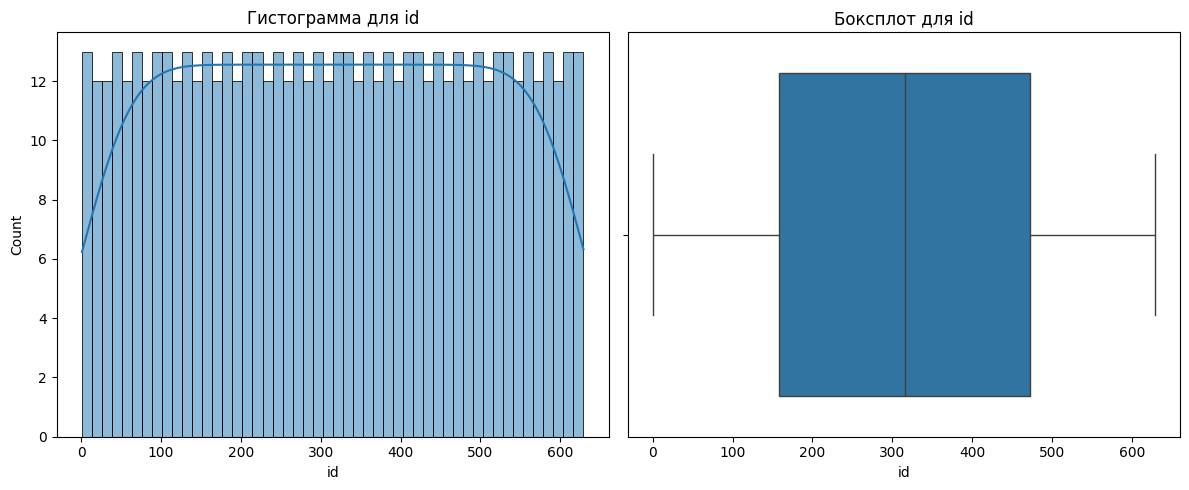

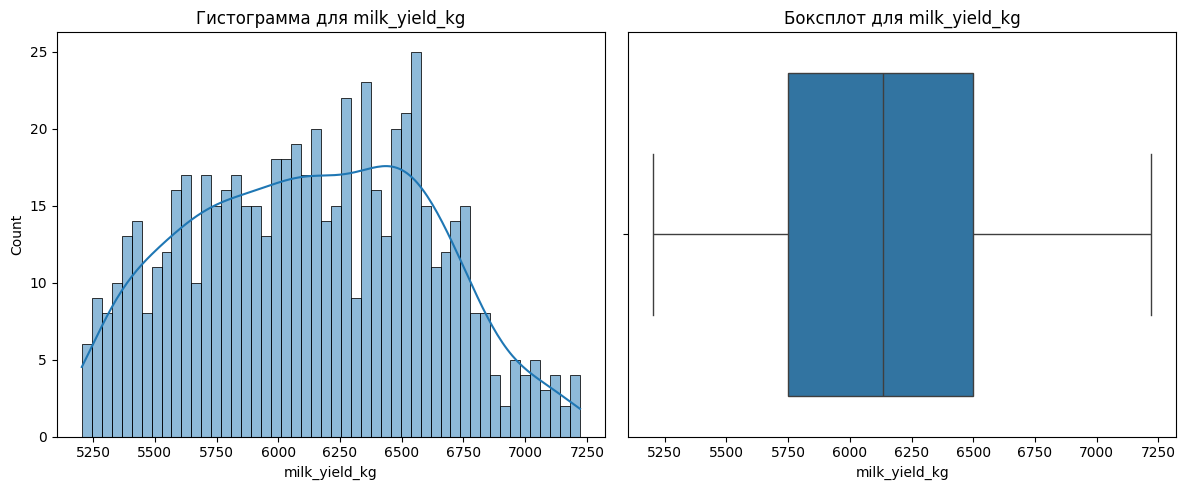

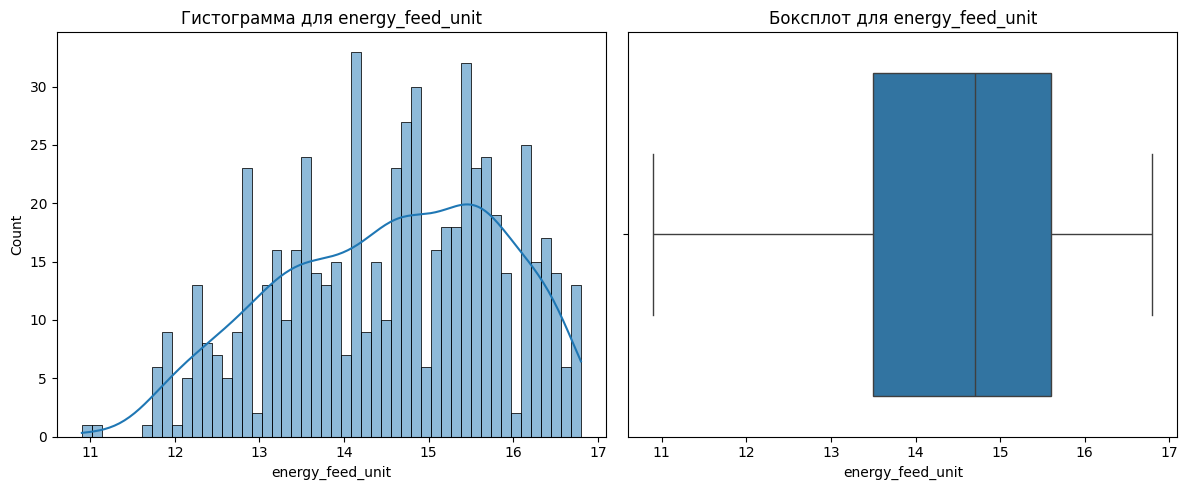

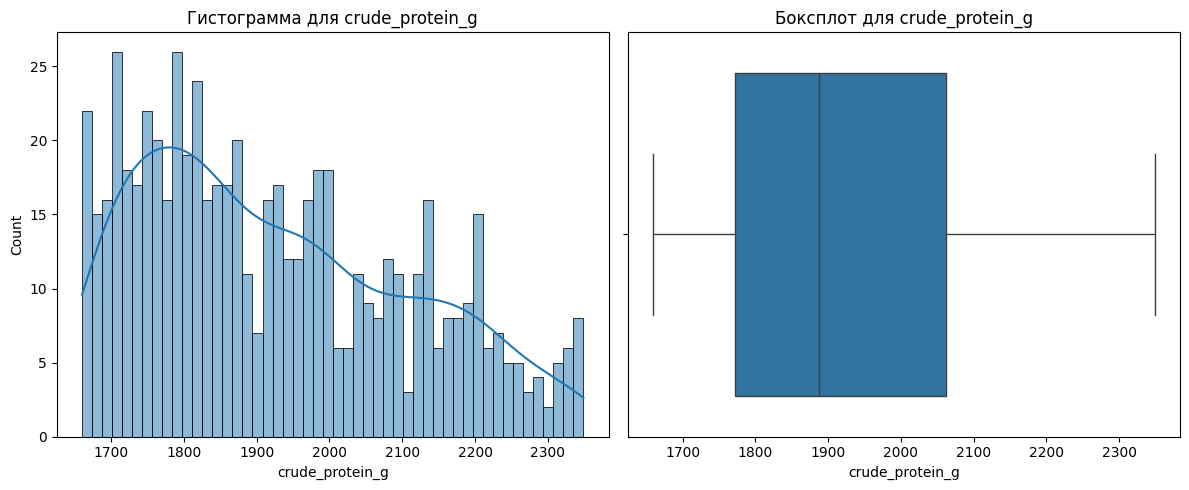

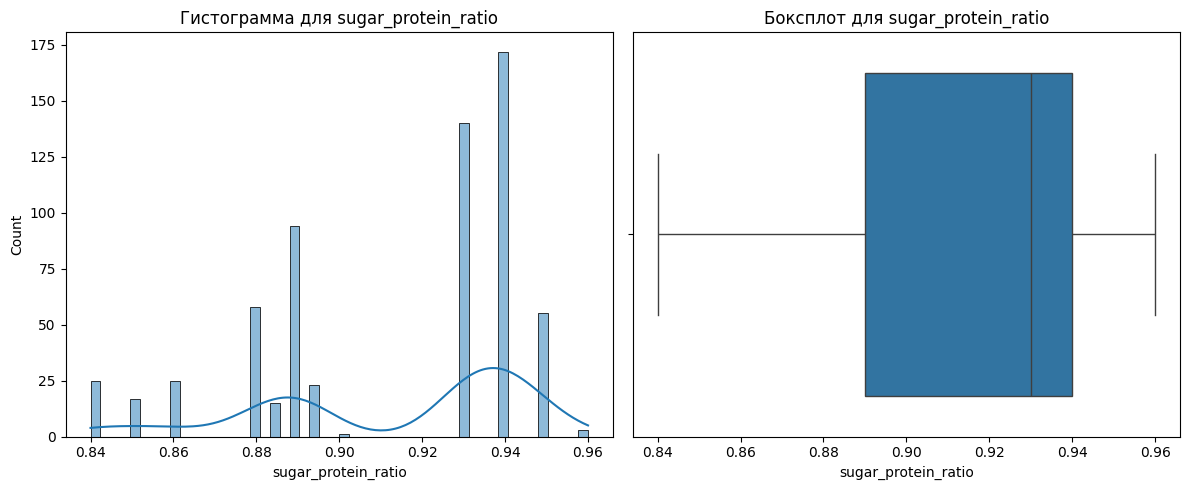

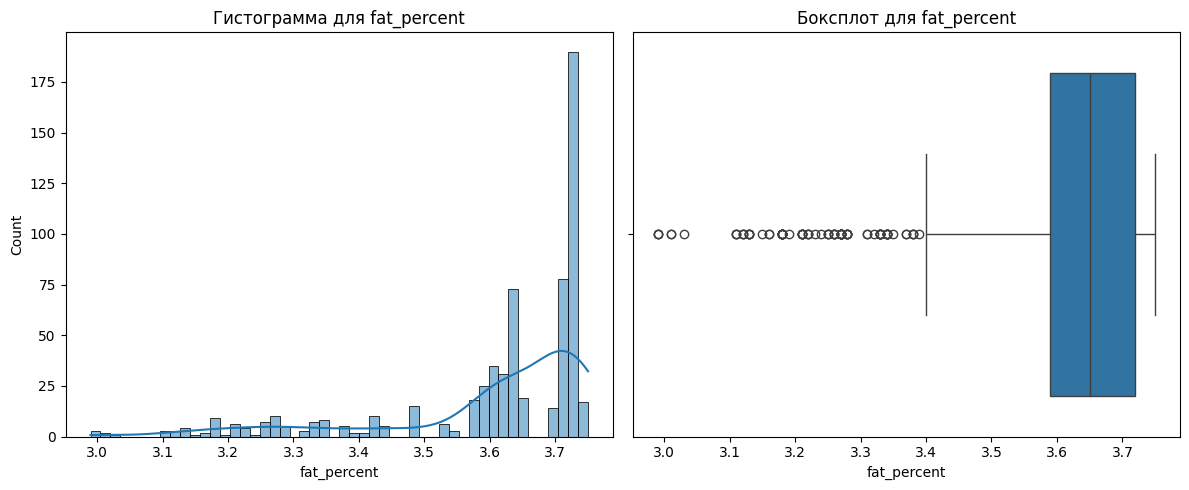

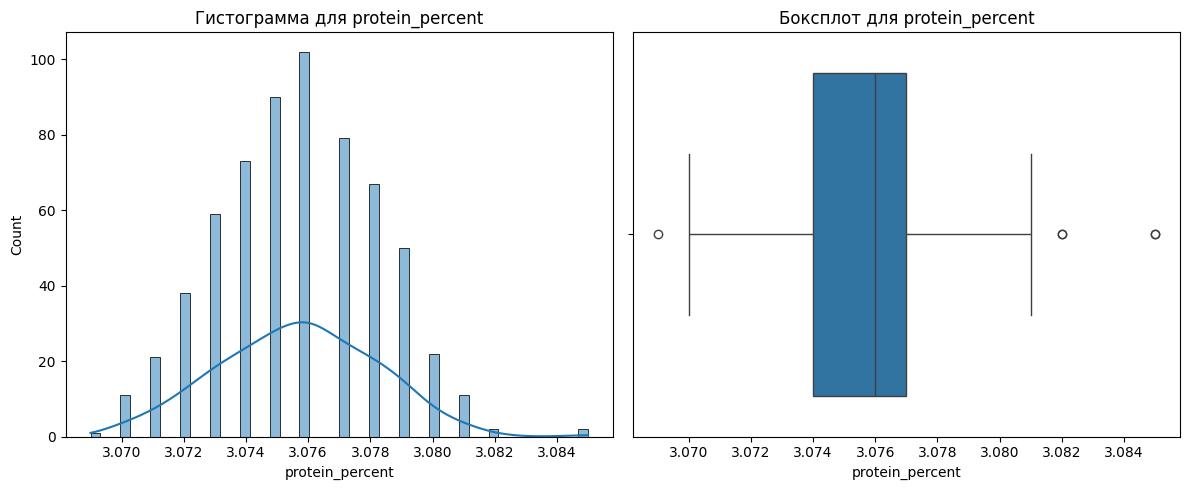

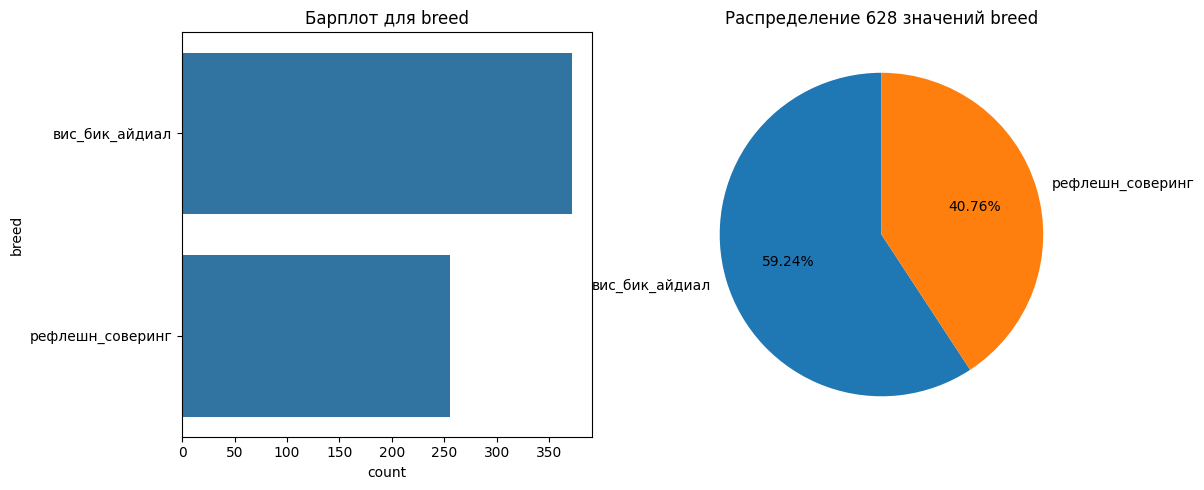

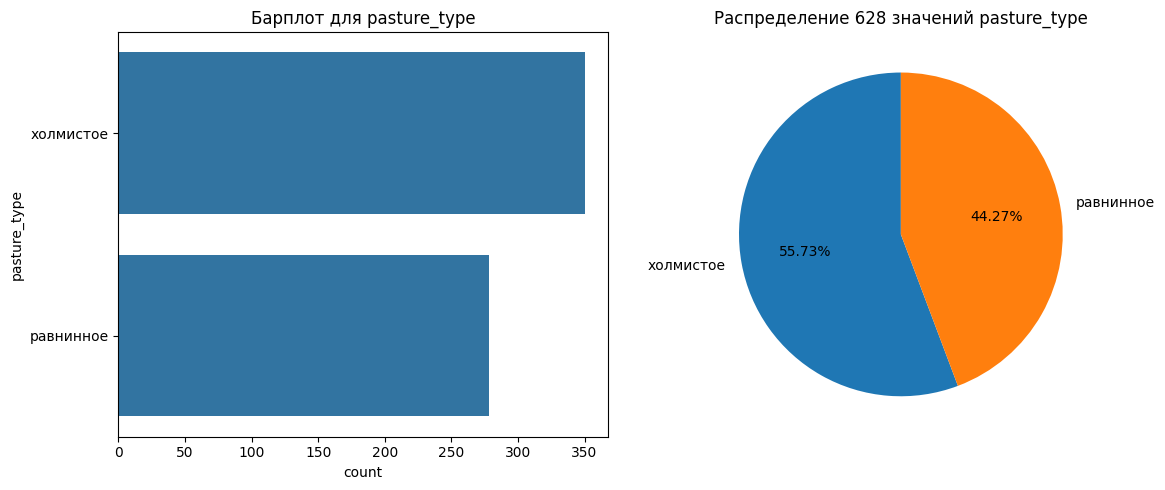

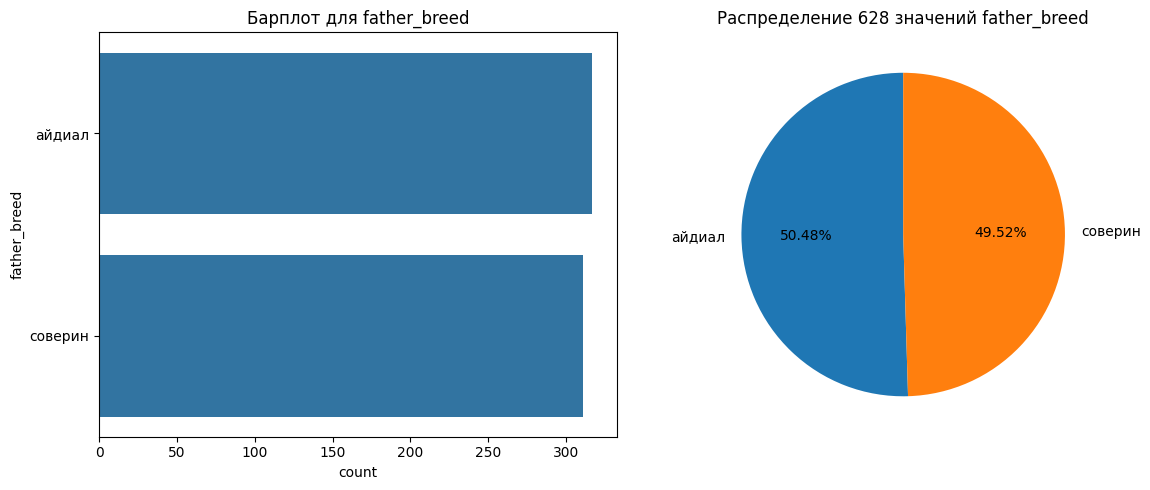

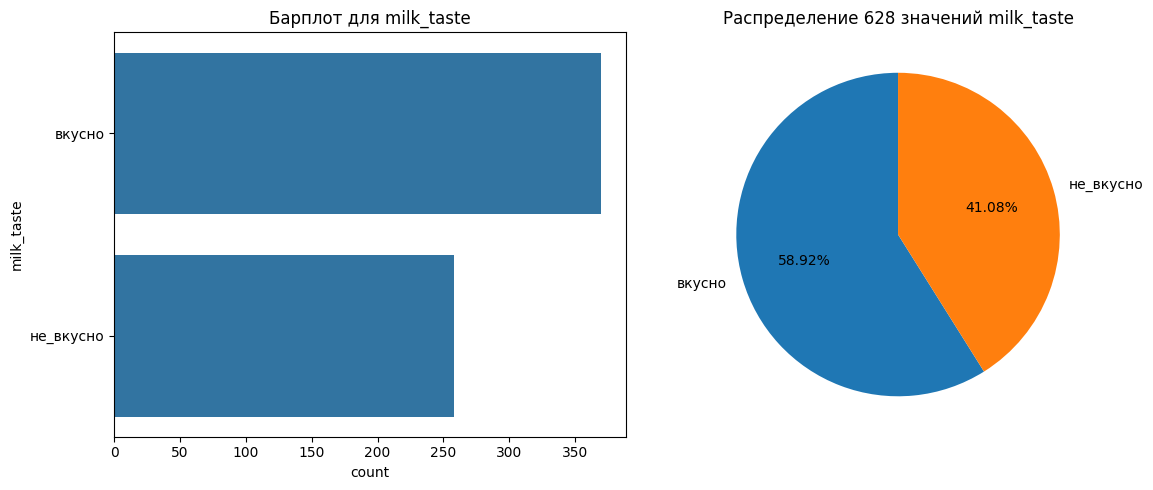

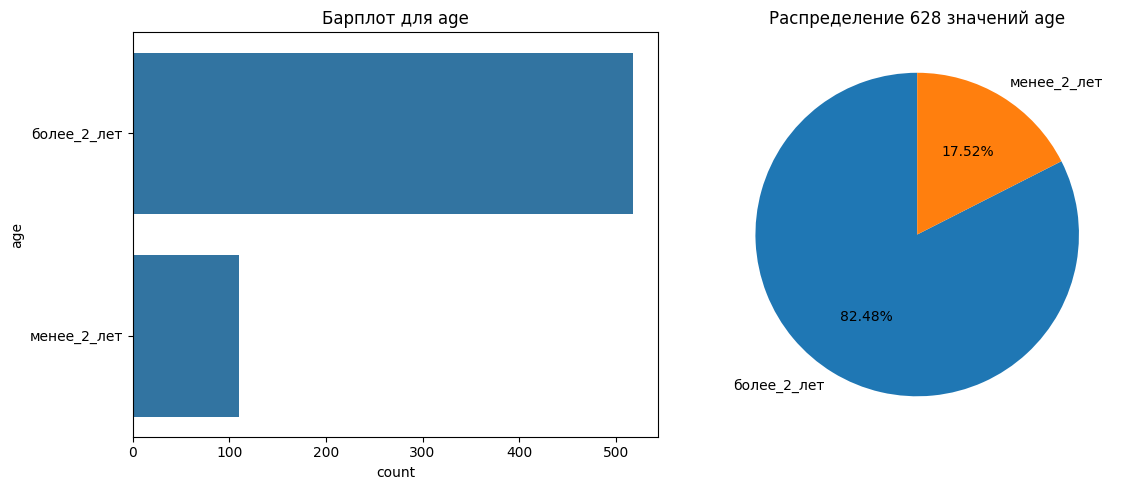

In [1276]:
plotting_stat_graphs(data_ferma)

#### data_dad

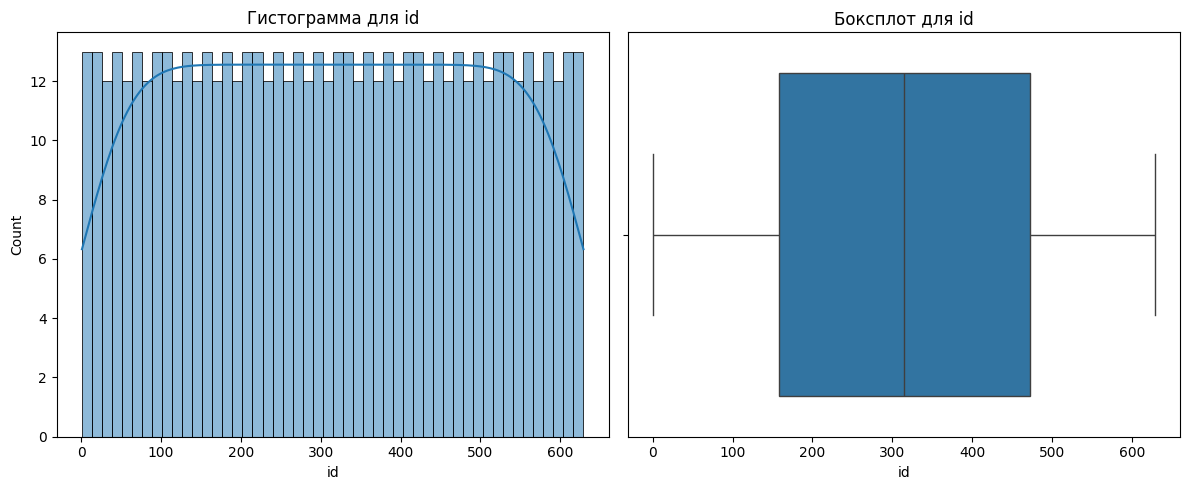

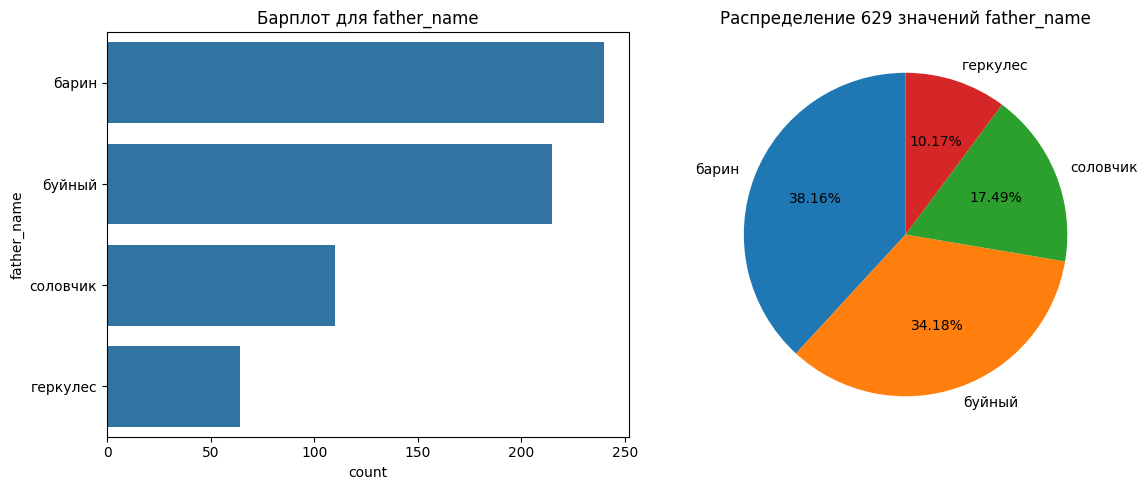

In [1277]:
plotting_stat_graphs(data_dad)

#### data_buy

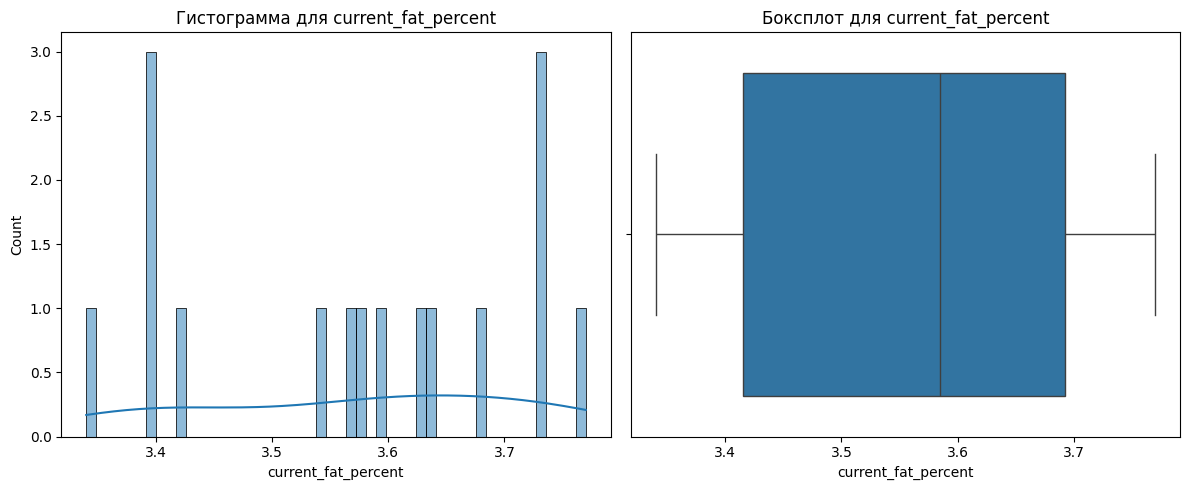

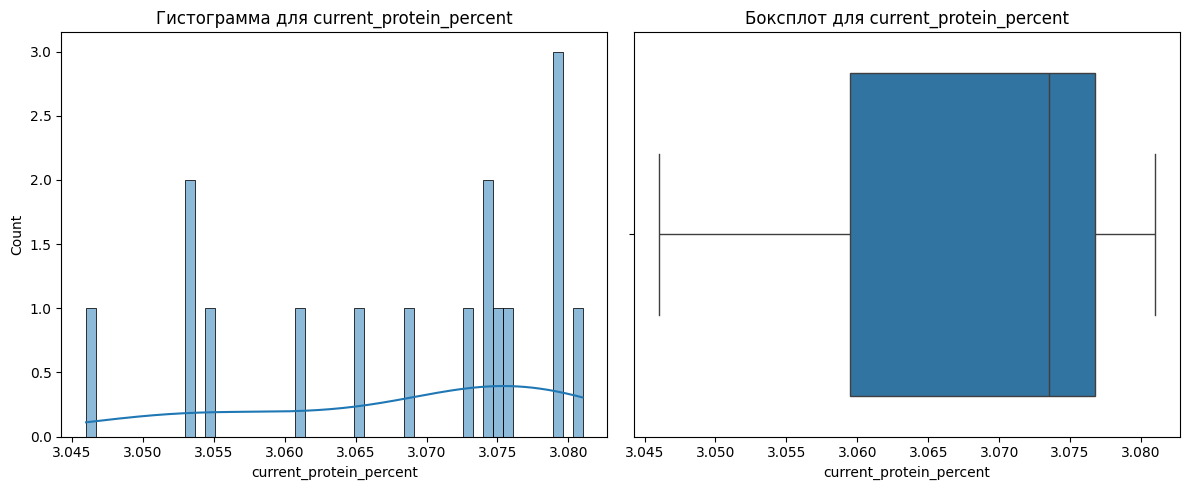

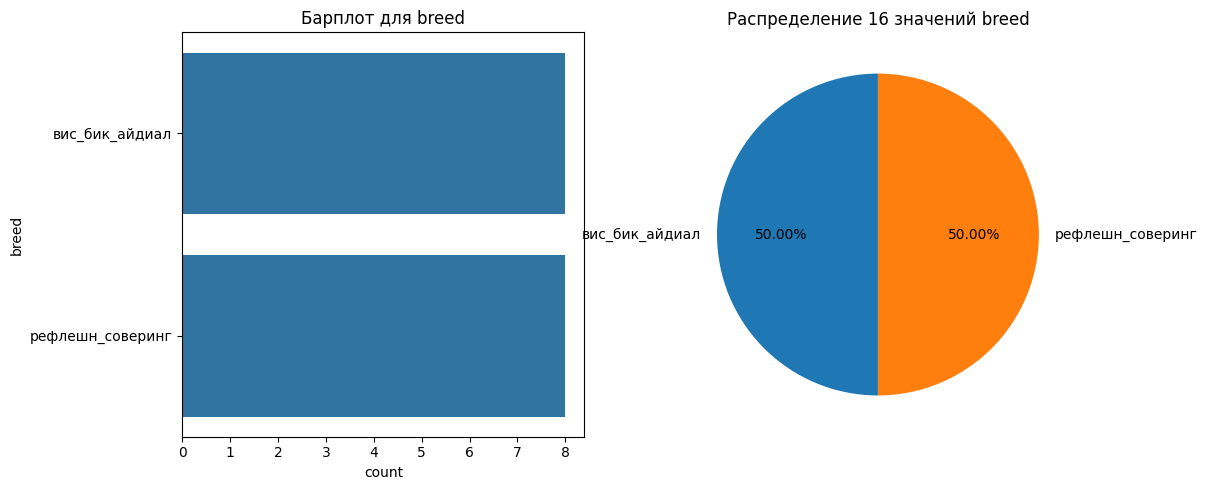

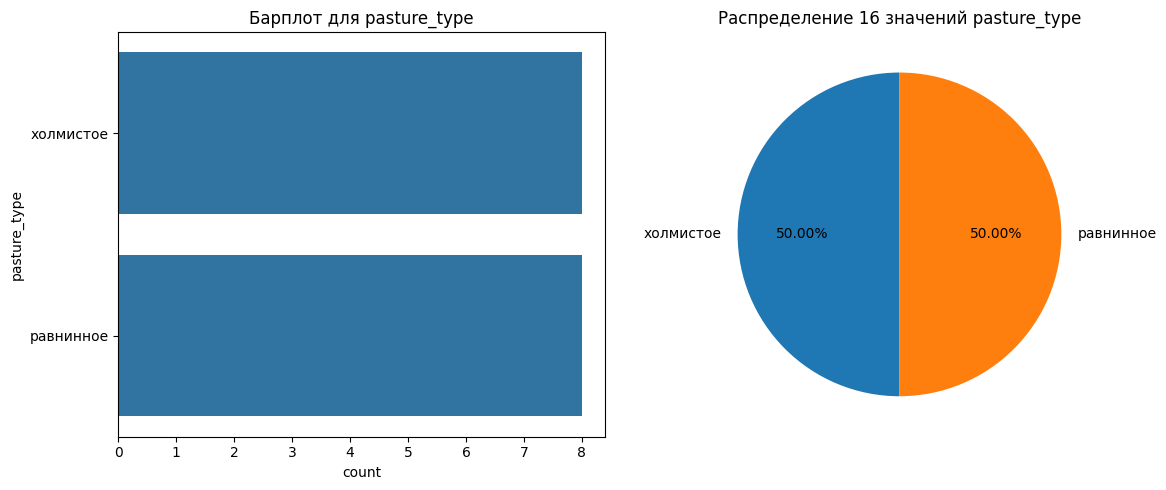

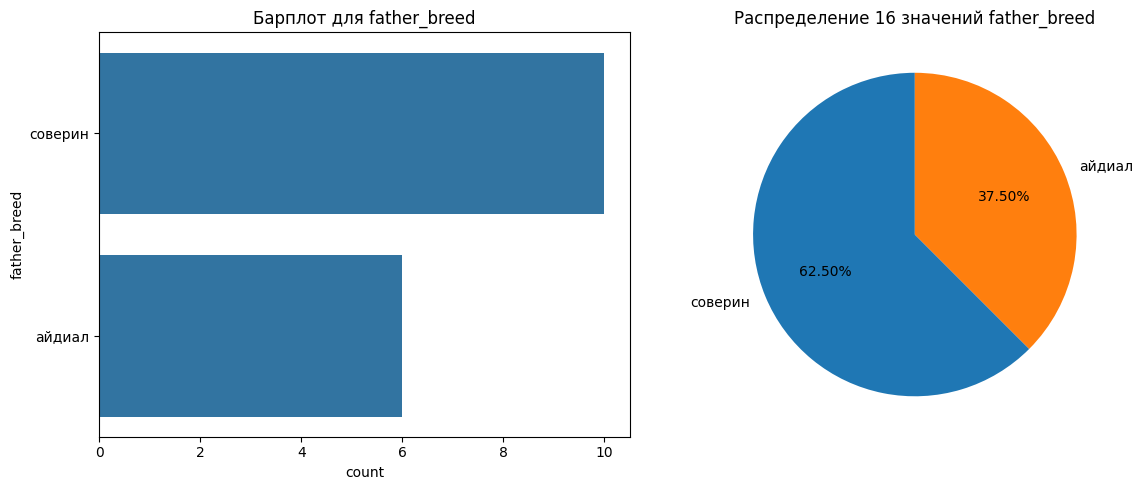

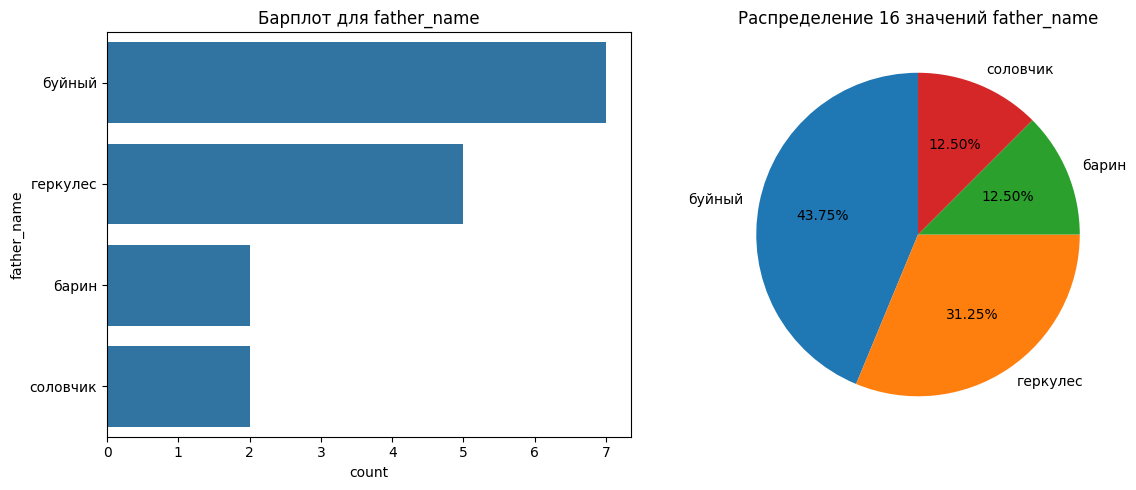

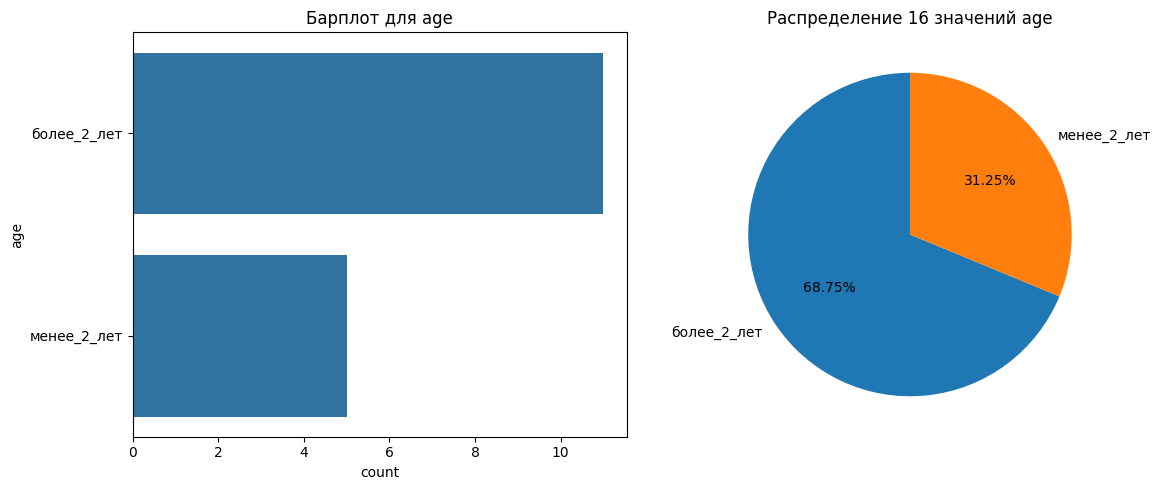

In [1278]:
plotting_stat_graphs(data_buy)

**Промежуточный вывод**:

* Был удален нереалистичный выброс удоя молока в таблице `milk_yield_kg`
* Остальные данные и распределения выглядят реалистично
* Заметки по категориальным признакам
  * Есть сильные перекосы в категориальных признаках:
    * Возраст коров: везде преобладают взрослые коровы старше 2 лет
    * В таблице `data_buy` больше коров от отца породы `Соверин`
    * Перекос в потомствах от разных быков - но это менее значимо для нашего анализа
* Заметки по количественным признакам
  * Есть левые выбросы в столбце `fat_percent`
  * Несколько двусторонних выбросов в столбце `protein_percent`
  * СПО (Сахаро-протеиновое соотношение) в таблице `data_ferma` имеет тримоальное распределение - это может быть связано с породами коров и/или типом кормления и/или возрастом и, может, чем-то другим

### Изучение СПО из таблицы `data_ferma`

Изучим от чего зависит СПО у коров

Посмотрим какие три основных пика есть на гистограмме

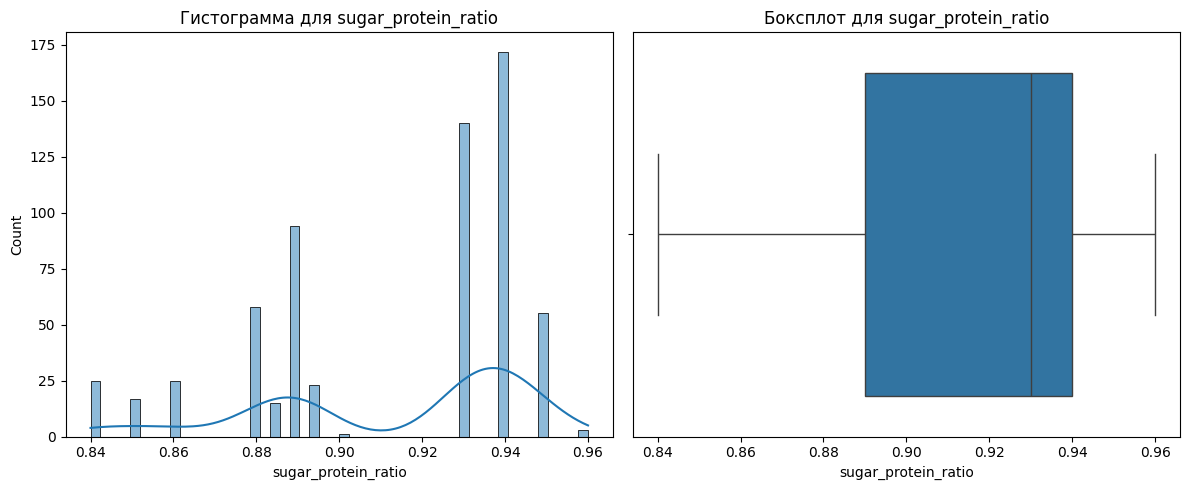

In [1279]:
plotting_stat_graphs(data_ferma['sugar_protein_ratio'])

In [1280]:
data_ferma.columns

Index(['id', 'milk_yield_kg', 'energy_feed_unit', 'crude_protein_g',
       'sugar_protein_ratio', 'breed', 'pasture_type', 'father_breed',
       'fat_percent', 'protein_percent', 'milk_taste', 'age'],
      dtype='object')

In [1281]:
ranges = [(0.83, 0.87), (0.87, 0.91), (0.91, 0.97)]
# features = ['breed', 'age', 'pasture_type', 'milk_taste']
features = ['age', 'milk_taste']

for i, range_ in enumerate(ranges):
    print(f'\t\t\t\t{i + 1} интервал: ({range_[0]}, {range_[1]})')
    for feature in features:
        print(
            data_ferma
            .loc[
                (data_ferma['sugar_protein_ratio'] > range_[0]) & 
                (data_ferma['sugar_protein_ratio'] < range_[1]), 
                feature]
            .value_counts()
        )
        print()
    print('\n')

				1 интервал: (0.83, 0.87)
age
менее_2_лет    40
более_2_лет    27
Name: count, dtype: int64

milk_taste
не_вкусно    44
вкусно       23
Name: count, dtype: int64



				2 интервал: (0.87, 0.91)
age
более_2_лет    122
менее_2_лет     69
Name: count, dtype: int64

milk_taste
вкусно       117
не_вкусно     74
Name: count, dtype: int64



				3 интервал: (0.91, 0.97)
age
более_2_лет    369
менее_2_лет      1
Name: count, dtype: int64

milk_taste
вкусно       230
не_вкусно    140
Name: count, dtype: int64





Из наиболее интересного можно заметить, что самое низкое СПО в большинстве случаев соответствует молодым коровам. При этом вкус такого молока чаще НЕ нравится фермеру

### Вывод

* Был удален нереалистичный выброс удоя молока в таблице `milk_yield_kg`
* Остальные данные и распределения выглядят реалистично
* Заметки по категориальным признакам
  * Есть сильные перекосы в категориальных признаках:
    * Возраст коров: везде преобладают взрослые коровы старше 2 лет
    * В таблице `data_buy` больше коров от отца породы `Соверин`
    * Перекос в потомствах от разных быков - но это менее значимо для нашего анализа
* Заметки по количественным признакам
  * Есть левые выбросы в столбце `fat_percent`
  * Несколько двусторонних выбросов в столбце `protein_percent`
  * СПО (Сахаро-протеиновое соотношение) в таблице `data_ferma` имеет тримоальное распределение - это связано с возрастом коров и, может, чем-то еще. При этом молоко с низким СПО нравится фермеру реже

Другие выбросы в данных убирать не будем, так как эти значения могут нести полезную информацию для дальнейшего анализа

## Корреляционный анализ

В этой части будем рассматривать зависимости в таблице `data_ferma`

Сначала добавим столбец с именами отцов

In [1282]:
data_ferma_whole = data_ferma.merge(
    data_dad,
    on='id',
    how='inner'
)

display(data_ferma.shape)
data_ferma_whole.shape

(628, 12)

(628, 13)

### Построение матриц корреляции

Помотрим на то, как распределены количественные данные

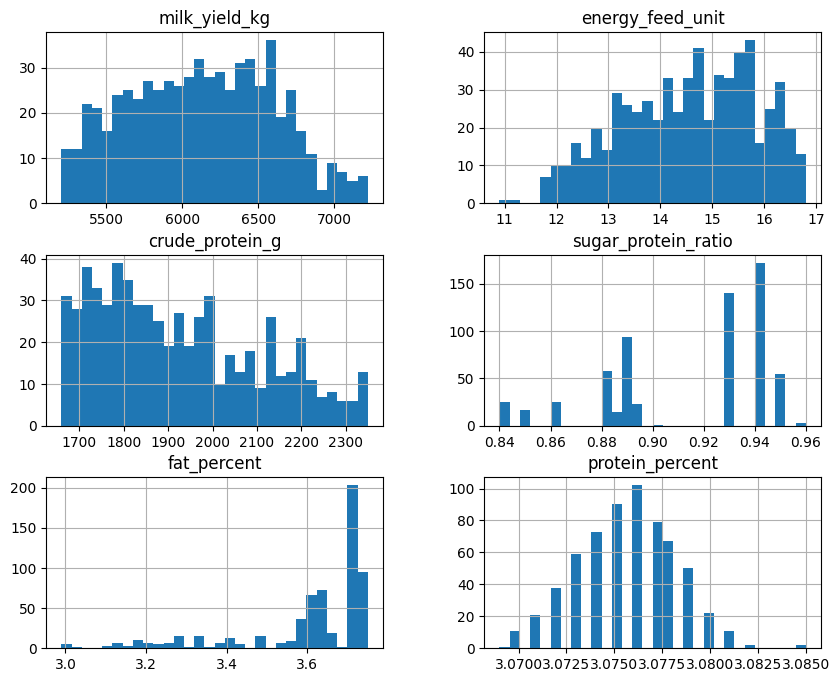

In [1283]:
(
    data_ferma_whole
    .select_dtypes(include=["number"])
    .drop(columns=['id'], axis=1)
    .hist(figsize=(10, 8), bins=30)
);

Нормально распределено только процентное содержание протеина. Вместо корреляции Пирсона будем использовать корреляцию Спирмена

Сначала построим матрицу корреляции Пирсона между количественными признаками

<Axes: title={'center': 'Матрица корреляции Спирмена для таблицы data_ferma'}>

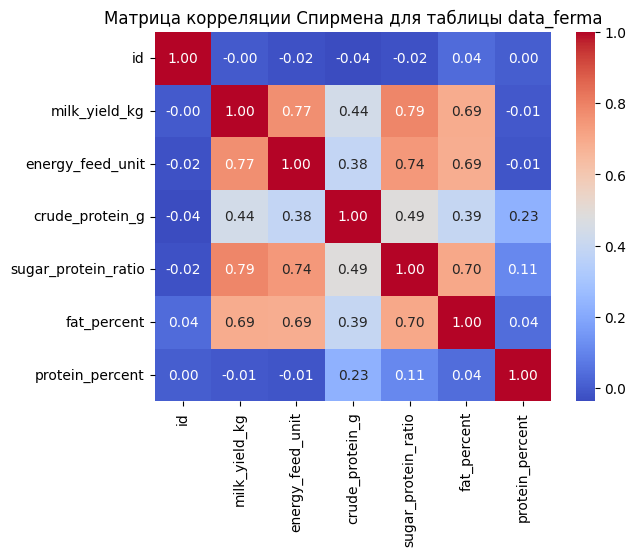

In [1284]:
plt.title('Матрица корреляции Спирмена для таблицы data_ferma')
sns.heatmap(
    data_ferma_whole.select_dtypes(include=["number"]).corr('spearman'),
    annot=True,
    fmt='.2f',
    cmap='coolwarm'
)

Также построим матрицу корреляции $\phi_k$ для всех столбцов

interval columns not set, guessing: ['id', 'milk_yield_kg', 'energy_feed_unit', 'crude_protein_g', 'sugar_protein_ratio', 'fat_percent', 'protein_percent']


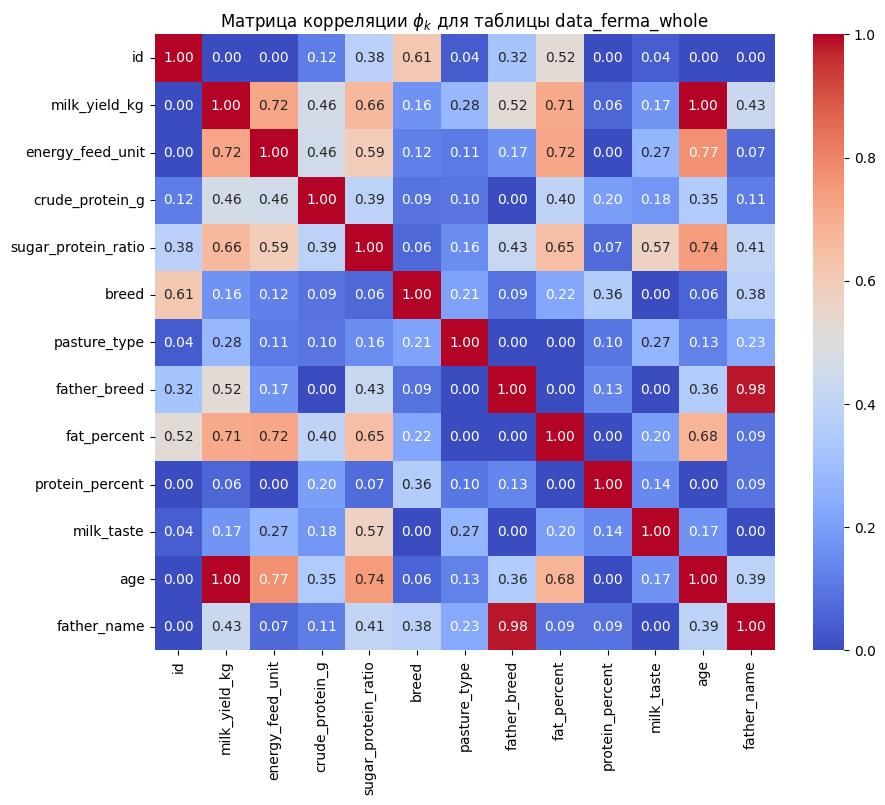

In [1380]:
plt.figure(figsize=(10, 8))
plt.title(r'Матрица корреляции $\phi_k$ для таблицы data_ferma_whole')
sns.heatmap(
    data_ferma_whole.phik_matrix(),
    annot=True,
    fmt='.2f',
    cmap='coolwarm'
);

Промежуточный вывод на основе матриц корреляции:

1. Связь продуктивности и кормовых факторов:  
   - Высокая корреляция между `milk_yield_kg` (удой молока) и `sugar_protein_ratio` (сахаро-белковое соотношение) — **0.79** (Спирмен) и **0.66** ($\phi_k$), что указывает на важность баланса питательных веществ в корме для увеличения надоев.  
   - `energy_feed_unit` (энергия корма) сильно коррелирует с `fat_percent` (жирность молока) — **0.69** (Спирмен) и **0.72** ($\phi_k$), что подтверждает влияние энергетической ценности корма на качество молока.  

2. Возраст и продуктивность:  
   - В матрице $\phi_k$ наблюдается необычайно высокая корреляция между `age` (возраст) и `milk_yield_kg` (**1.00**).  

3. Слабые связи:  
   - `breed` (порода) и `pasture_type` (тип пастбища) слабо коррелируют с другими параметрами, что может означать их незначительное влияние на продуктивность в данном исследовании.  
   - `protein_percent` (процент белка) демонстрирует слабые связи с большинством переменных, кроме `crude_protein_g` (**0.23** по Спирмену).  

Таким образом, высокая корреляция между `energy_feed_unit` и `fat_percent`, а также между `milk_yield_kg` и `sugar_protein_ratio`, требует проверки на мультиколлинеарность при построении моделей.

### Построение диаграмм рассеяния для удоя и всех количественных признаков

Построим диаграммы рассеяния для удоя, учитывая значения категориальных признаков

In [1286]:
cat_columns = data_ferma_whole.select_dtypes(exclude=['number']).columns

cat_columns

Index(['breed', 'pasture_type', 'father_breed', 'milk_taste', 'age',
       'father_name'],
      dtype='object')

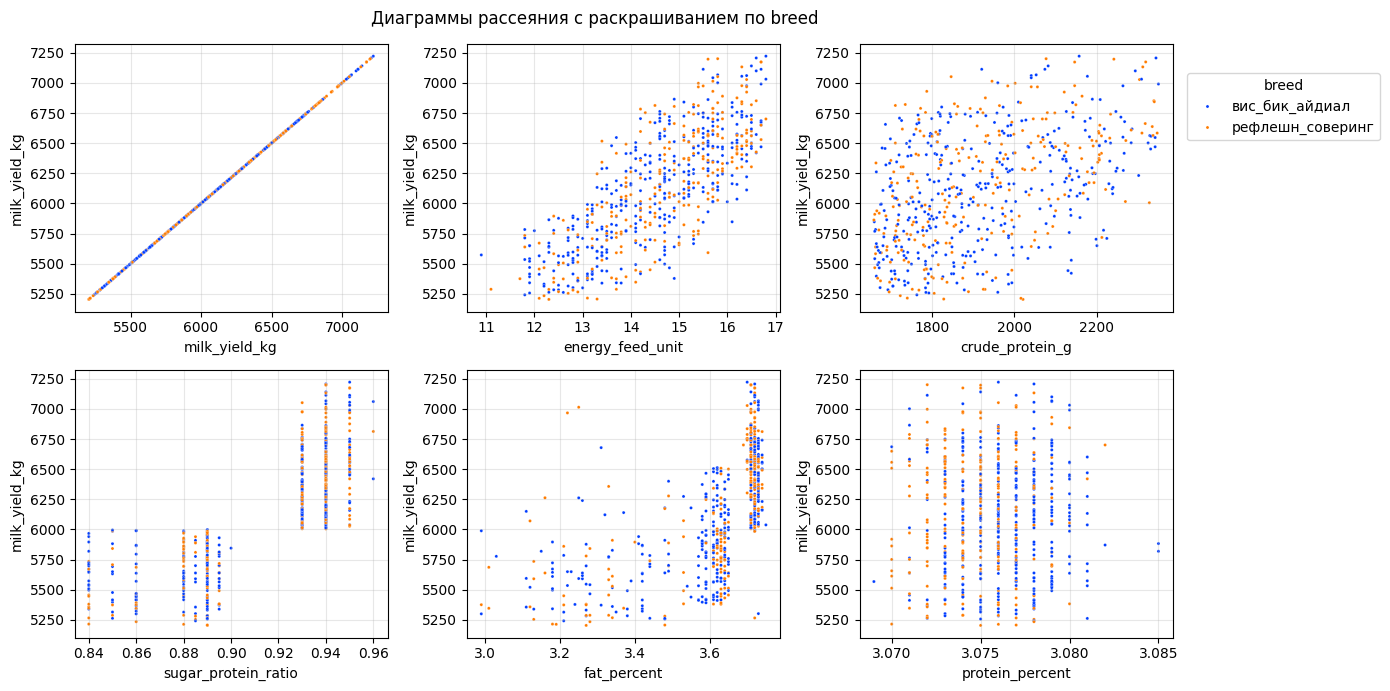

In [1287]:
plot_scatter_with_categories(data_ferma_whole, 'breed')

Общий анализ диаграмм:
* Можем увидеть, что удой растет с увеличением СПО - наблюдаются два скопления точек. При этом данная связь нелинейна
  
С породой никаких закономерностей нет

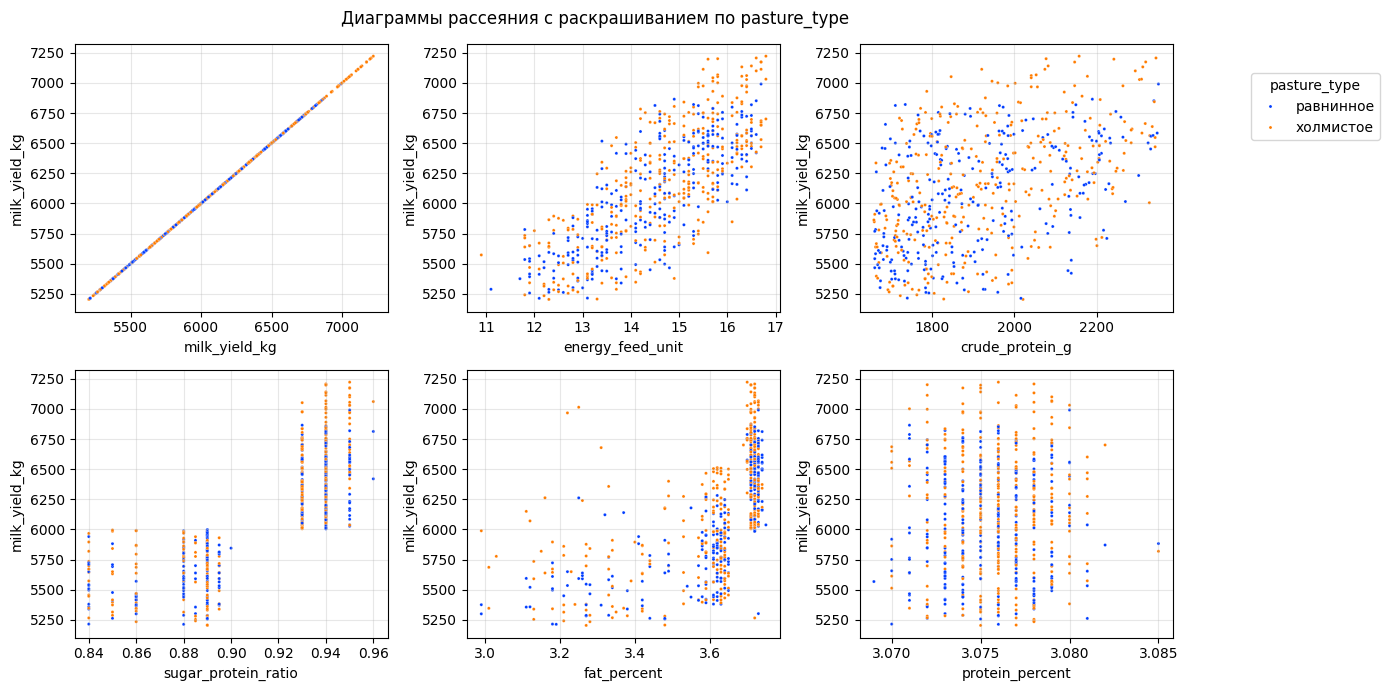

In [1288]:
plot_scatter_with_categories(data_ferma_whole, 'pasture_type')

С типом пастбища также закономерности не проглядываются

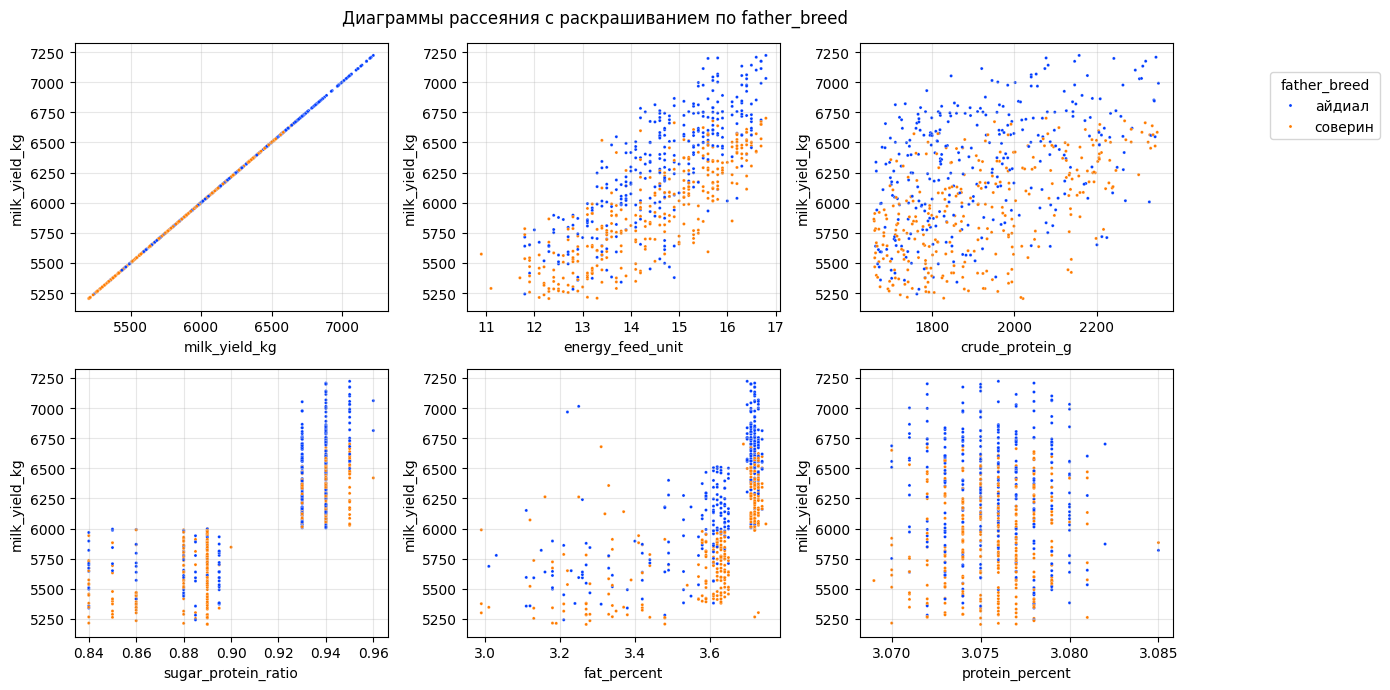

In [1289]:
plot_scatter_with_categories(data_ferma_whole, 'father_breed')

Здесь хорошо видно, что коровы с отцом породы "Соверин" дают больше молока

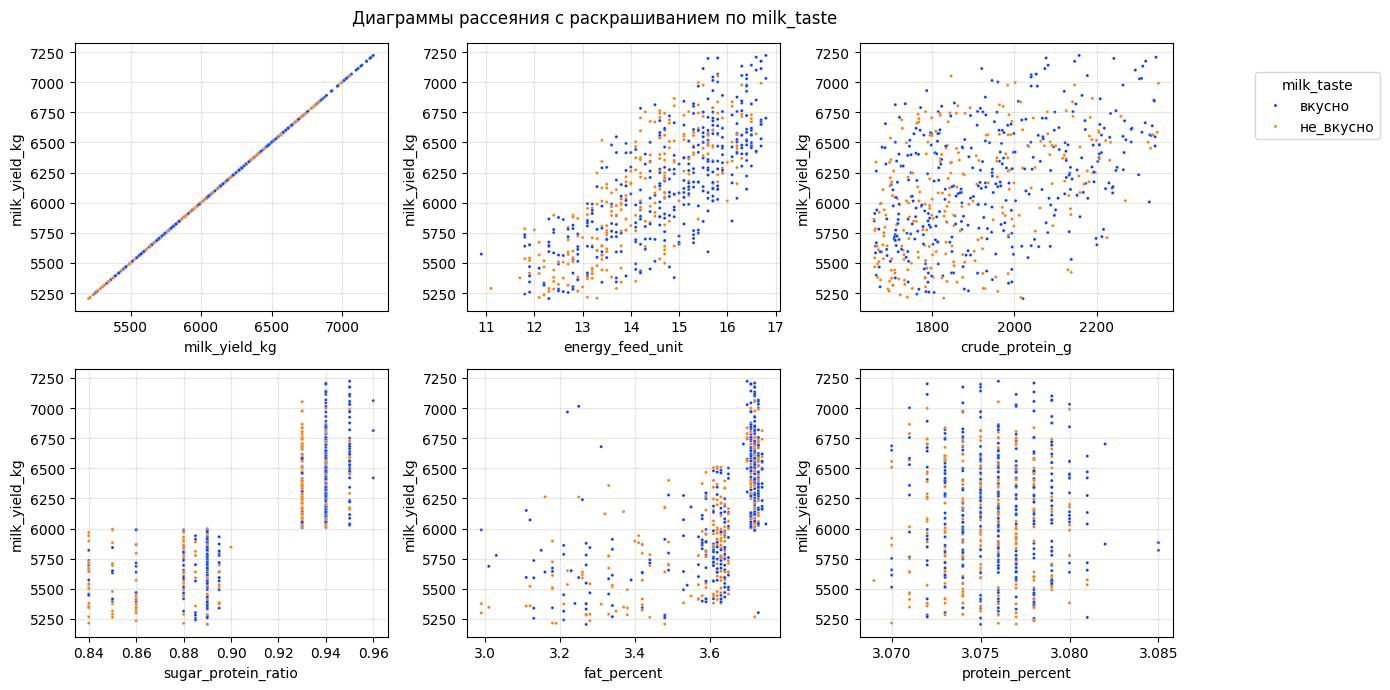

In [1290]:
plot_scatter_with_categories(data_ferma_whole, 'milk_taste')

Тут ничего закономерного нет

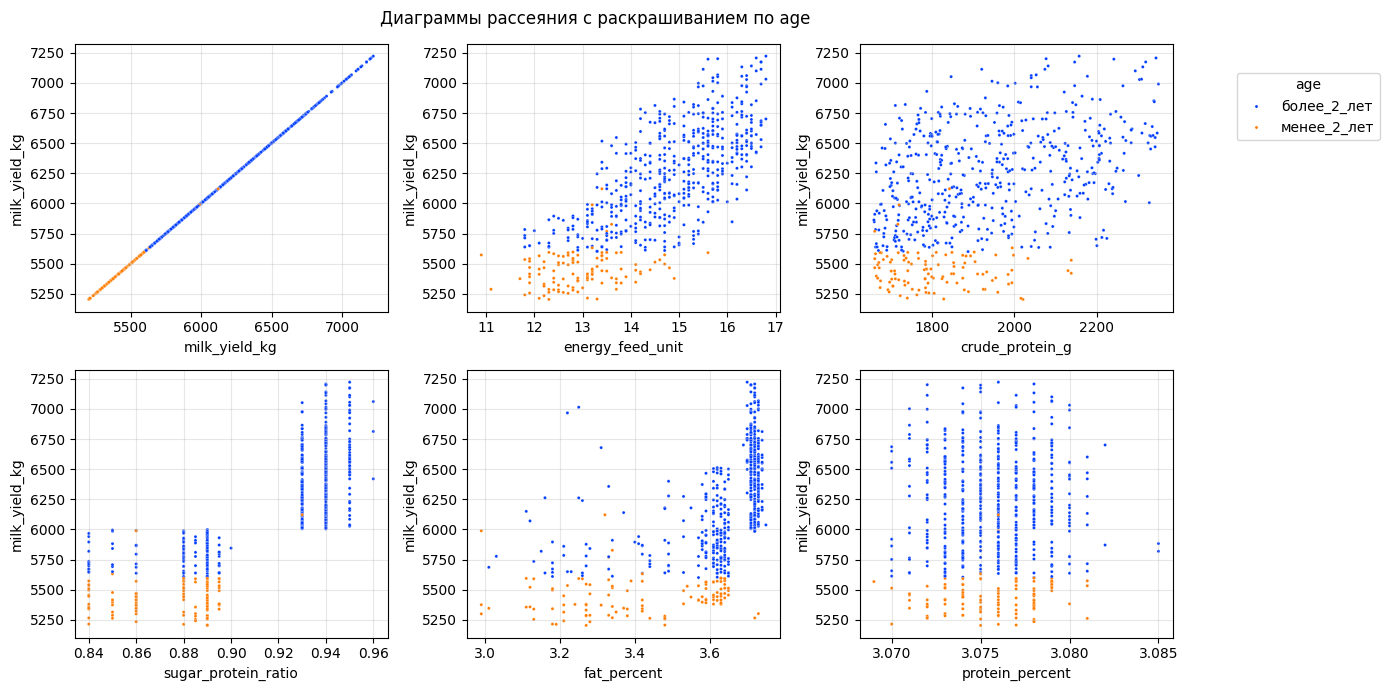

In [1291]:
plot_scatter_with_categories(data_ferma_whole, 'age')

Тут ярче всего прослеживается, что молодые коровы дают больше молока. Видимо, корреляция 1 соответствует действительности

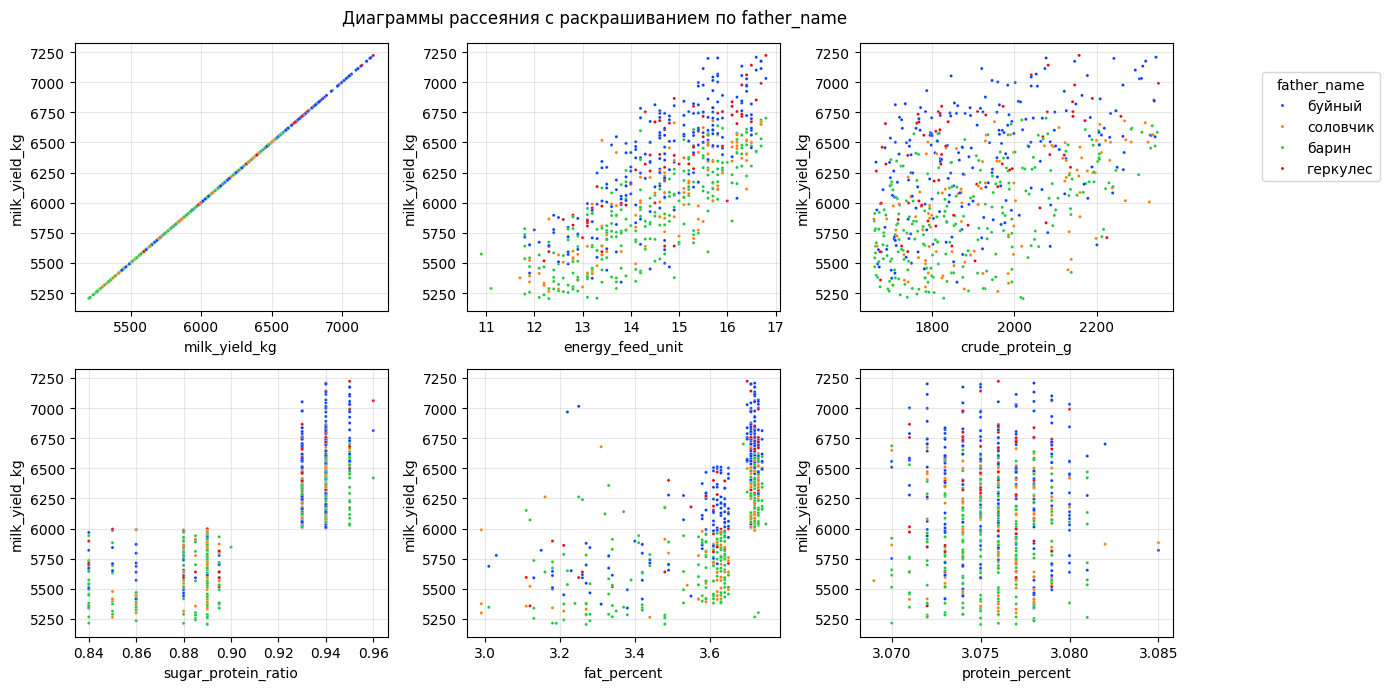

In [1292]:
plot_scatter_with_categories(data_ferma_whole, 'father_name')

В среднем у коров от быка "буйный" удой больше, чем у остальных. На воторм месте у коров от "соловчика", от остальных отцов удой "размазан". Однако тут нет строгости, это скорее наблюдение по данным

### Вывод

На основе матриц корреляции для таблицы `data_ferma` были выявлены следующие зависимости:

1. Связь продуктивности и кормовых факторов:  
   - Высокая корреляция между `milk_yield_kg` (удой молока) и `sugar_protein_ratio` (сахаро-белковое соотношение) — **0.81** (Пирсон) и **0.66** ($\phi_k$), что указывает на важность баланса питательных веществ в корме для увеличения надоев.  
   - `energy_feed_unit` (энергия корма) сильно коррелирует с `fat_percent` (жирность молока) — **0.64** (Пирсон) и **0.72** ($\phi_k$), что подтверждает влияние энергетической ценности корма на качество молока.

2. Возраст и продуктивность:  
   - В матрице $\phi_k$ наблюдается необычайно высокая корреляция между `age` (возраст) и `milk_yield_kg` (**1.00**).

3. Слабые связи:  
   - `breed` (порода) и `pasture_type` (тип пастбища) слабо коррелируют с другими параметрами, что может означать их незначительное влияние на продуктивность в данном исследовании.  
   - `protein_percent` (процент белка) демонстрирует слабые связи с большинством переменных, кроме `crude_protein_g` (**0.23** по Пирсону).

Таким образом, высокая корреляция между `energy_feed_unit` и `fat_percent`, а также между `milk_yield_kg` и `sugar_protein_ratio`, требует проверки на мультиколлинеарность при построении моделей.

При этом в данных наблюдается нелинейная зависимость удоя и СПО. При построении модели стоит попробовать разделить данные на две группы: удой < 6000кг и удой > 6000кг. Еще одним подходом может быть введение нового бинарного признака: "удой < 6000кг?"

Мультиколлинеарности между входными признаками нет

In [1293]:
# g = sns.PairGrid(
#     data_ferma_whole,
#     hue='milk_taste',
#     x_vars=data_ferma_whole.select_dtypes(include=['number']).columns,
#     y_vars=['milk_yield_kg']
# )

# g.map(sns.scatterplot)

## Обучение модели линейной регрессии

### Регрессия на всех объектах таблицы `data_ferma`

Еще раз выведем матрицу корреляции $\phi_k$ для удоя

interval columns not set, guessing: ['id', 'milk_yield_kg', 'energy_feed_unit', 'crude_protein_g', 'sugar_protein_ratio', 'fat_percent', 'protein_percent']


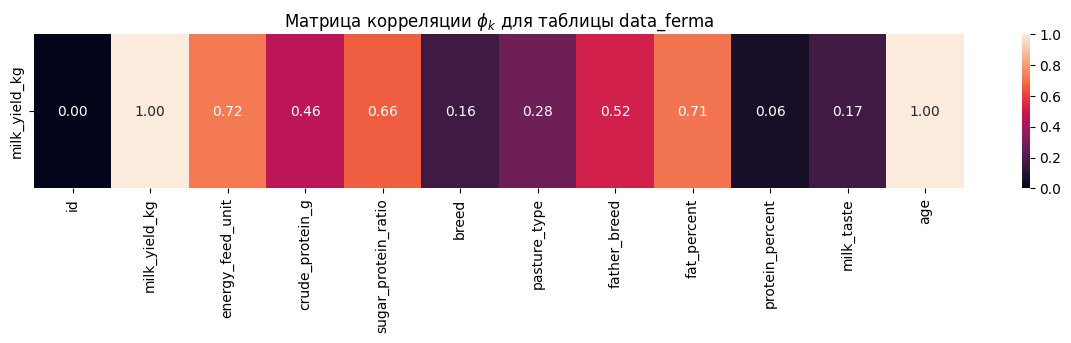

In [1294]:
plt.figure(figsize=(15, 2))
plt.title(r'Матрица корреляции $\phi_k$ для таблицы data_ferma')
sns.heatmap(
    data_ferma.phik_matrix().loc[['milk_yield_kg']],
    annot=True,
    fmt='.2f'
);

Подготовим данные из `data_ferma`. В качестве целевого признака - удой (`milk_yield_kg`).

В качестве входных признаков возьмем все, за исключением типа пастбища (`pasture_type`), id, количества протеина (`protein_percent`) и вкуса молока (`milk_taste`).

Эти данные не показали корреляции с целевым признаком, а значит в линейной можели будут просто создавать шум. При этом порода 'breed' из практических соображений должна быть связана с удойной характеристикой коровы, поэтом этот признак не уберем

Категорильные признаки кодируем, используя OneHotEncoder, количественные - StandardScaler. Для обработки дамми-ловышек в OHE используется параметр `drop='first'`, из-за чего также не меняется количество столбцов, так как все категориальные признаки бинарные.

In [1295]:
X_train, X_test, y_train, y_test, transformer_1 = data_preparing(
    (
        data_ferma
        .drop(columns=['pasture_type', 'protein_percent', 
                       'milk_taste', 'id'])
    ), 'milk_yield_kg'
    )

Выбор целевого признака
	Целевой признак: milk_yield_kg
	X.shape = (628, 7)
	y.shape = (628,)

Разбиение на тестовую и тренировочную подвыборки

Разбиение на категориальные и количественные признаки
	Категориальных признаков: 3
	Количественных признаков: 4

Преобразование данных
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] ........... (2 of 2) Processing cat, total=   0.0s
После преобразования
	X_train.shape = (502, 7)
	y_train.shape = (502,)


Построим линейную модель

In [1296]:
from sklearn.linear_model import LinearRegression

lin_reg_1 = LinearRegression()

predictions_1 = lin_reg_1.fit(X_train, y_train).predict(X_test)

Посчитаем метрики

In [1297]:
print_all_metrics(y_test, predictions_1, is_classification=False)

MSE: 42315.38
MAE: 159.87
RMSE: 205.71
R^2: 0.80


#### Анализ остатков

Посчитаем остатки

In [1298]:
residuals_1 = y_test - predictions_1

Построим гистограмму распределения остатков

Text(0.5, 0, 'Ошибка')

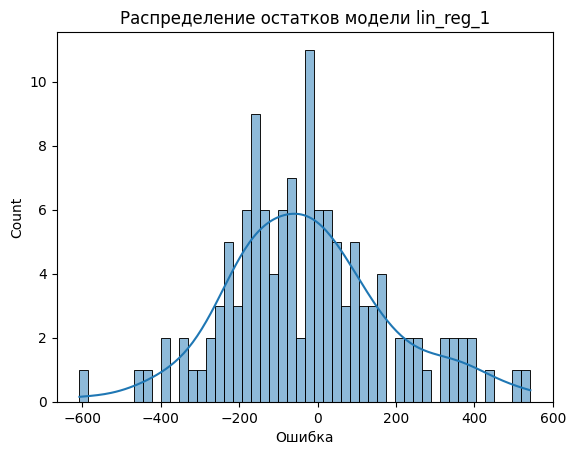

In [1299]:
sns.histplot(
    residuals_1,
    kde=True,
    bins=50
)

plt.title(f'Распределение остатков модели lin_reg_1')
plt.xlabel('Ошибка')

Данные распределены нормально, перекоса в данных не наблюдается

Рассмотрим рассеяние остатков

Text(0, 0.5, 'Ошибка')

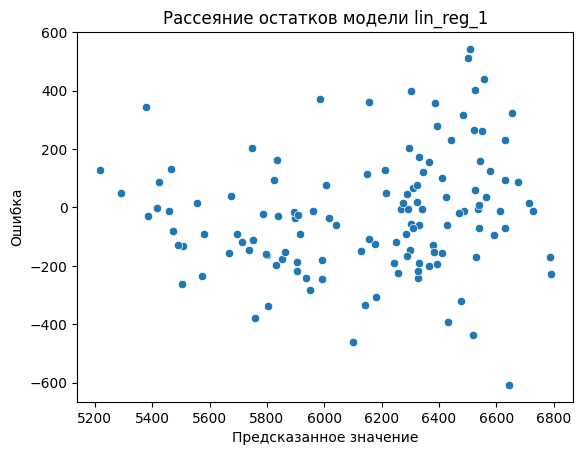

In [1300]:
sns.scatterplot(
    x=predictions_1,
    y=residuals_1
)

plt.title('Рассеяние остатков модели lin_reg_1')
plt.xlabel('Предсказанное значение')
plt.ylabel('Ошибка')

По рассеянию видим, что при удое выше 6000кг ошибка модели увеличивается

Это может быть вызвано нехваткой данных или наличием нелинейности в данных - мы сталкивались с этим при рассмотрении диаграмм распределения

In [1301]:
# sns.residplot(
#     x=predictions_1,
#     y=residuals_1,
#     lowess=True
# )

#### Промежуточный вывод

Модель обучена на столбцах 'energy_feed_unit', 'crude_protein_g', 'sugar_protein_ratio', 'father_breed', 'fat_percent', 'age', так как целевой признак 'milk_yield_kg' имеет наибольшую корреляцию именно с этими признаками. Также был использован признак 'breed', которой явной связи не показал, но из практических соображений должен также влиять на целевой признак

По результатам обучения модели были получены следующие показатели метрик:

* MSE: 42315.38
* MAE: 159.87
* RMSE: 205.71
* $\text{R}^2$: 0.80

Анализ остатков показал, что последние распределены нормально, без явных отклонений. Однако при предсказании значения удоя выше 6000кг модель начинает ошибаться сильнее. Для решения этой проблемы можно попробовать добавить больше входных признаков, либо преобразовать существующие. Также можно попробовать обучить две модели - для высокго и низкого удоев.

### Регрессия на данных с учетом связи входных признаков

На диаграммах рассеяния мы наблюдали нелинейные связи удоя с СПО и ЭКЭ. Попробуем избавиться от их эффекта:

* Преобразуем СПО в бинарный признак: СПО больше 0.91?
* Возведем ЭКЕ в квадрат

In [1302]:
new_data_ferma = data_ferma.copy(deep=True)

new_data_ferma['sugar_protein_ratio'] = (
    new_data_ferma
    .loc[:, 'sugar_protein_ratio']
) > 0.91

new_data_ferma['energy_feed_unit_squared'] = (
    new_data_ferma
    .loc[:, 'energy_feed_unit']
) ** 2

new_data_ferma.drop(columns=['energy_feed_unit'], axis=1, inplace=True)

new_data_ferma.head()

,id,milk_yield_kg,crude_protein_g,sugar_protein_ratio,breed,pasture_type,father_breed,fat_percent,protein_percent,milk_taste,age,energy_feed_unit_squared
0,1,5863,1743,False,вис_бик_айдиал,равнинное,айдиал,3.58,3.076,вкусно,более_2_лет,201.64
1,2,5529,2138,False,вис_бик_айдиал,равнинное,соверин,3.54,3.079,вкусно,менее_2_лет,163.84
2,3,5810,1854,False,рефлешн_соверинг,холмистое,соверин,3.59,3.074,не_вкусно,более_2_лет,196.00
3,4,5895,2012,False,рефлешн_соверинг,холмистое,айдиал,3.40,3.075,не_вкусно,более_2_лет,153.76
4,5,5302,1675,False,вис_бик_айдиал,равнинное,соверин,3.73,3.073,вкусно,менее_2_лет,163.84


Посмотрим диаграммы рассеяния для новой таблицы

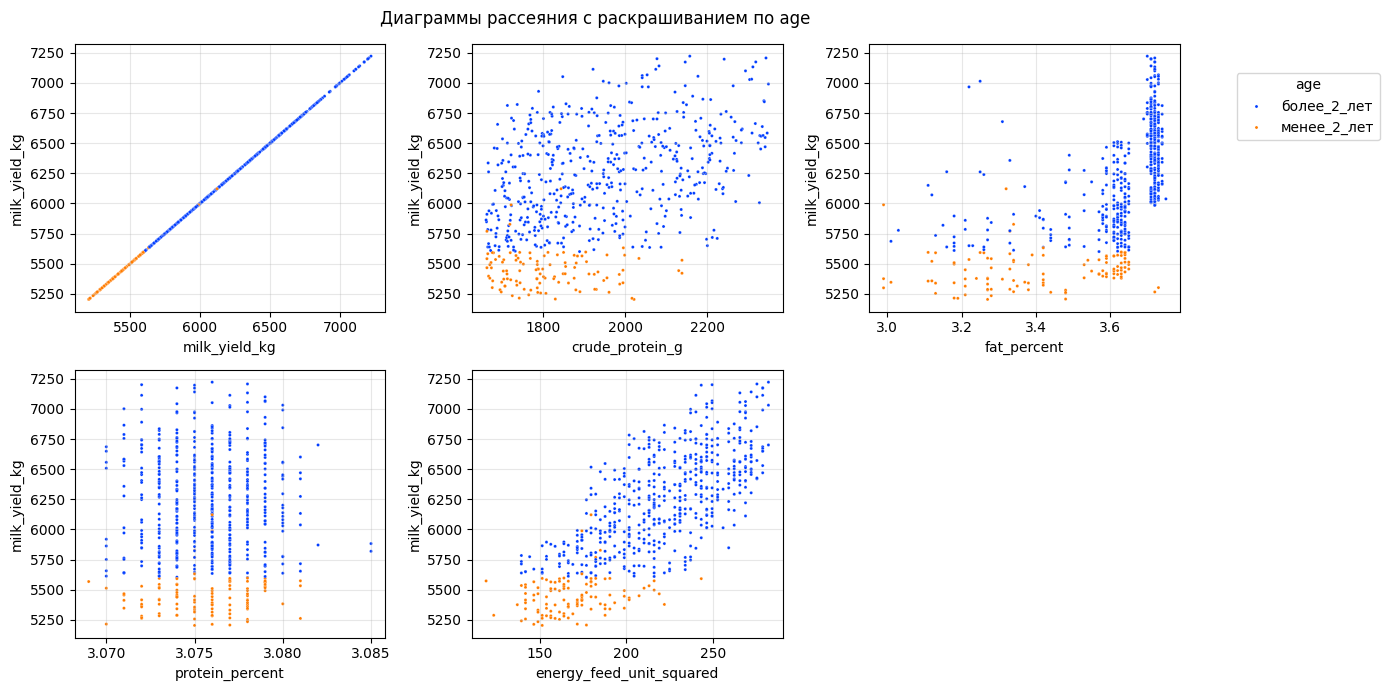

In [1303]:
plot_scatter_with_categories(
    new_data_ferma,
    category_column='age'
)

interval columns not set, guessing: ['id', 'milk_yield_kg', 'crude_protein_g', 'fat_percent', 'protein_percent', 'energy_feed_unit_squared']


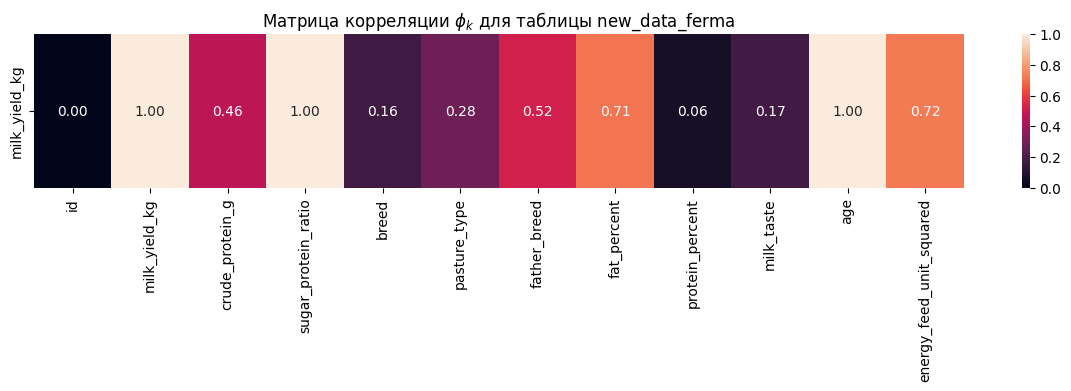

In [1304]:
plt.figure(figsize=(15, 2))
plt.title(r'Матрица корреляции $\phi_k$ для таблицы new_data_ferma')
sns.heatmap(
    new_data_ferma.phik_matrix().loc[['milk_yield_kg']],
    annot=True,
    fmt='.2f'
);

Бинарный признак `sugar_protein_ratio` теперь имеет коэффициент корреляции 1 - это должно улучшить нашу модель. При этом коэффициент для ЭКЕ не поменялся

Повторим действия прошлой части, создав модель `lin_reg_2`

In [1305]:
X_train, X_test, y_train, y_test, transformer_2 = data_preparing(
    (
        new_data_ferma
        .drop(columns=['pasture_type', 'protein_percent', 
                       'milk_taste', 'id'])
    ), 'milk_yield_kg'
    )

Выбор целевого признака
	Целевой признак: milk_yield_kg
	X.shape = (628, 7)
	y.shape = (628,)

Разбиение на тестовую и тренировочную подвыборки

Разбиение на категориальные и количественные признаки
	Категориальных признаков: 4
	Количественных признаков: 3

Преобразование данных
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] ........... (2 of 2) Processing cat, total=   0.0s
После преобразования
	X_train.shape = (502, 7)
	y_train.shape = (502,)


In [1306]:
lin_reg_2 = LinearRegression()

predictions_2 = lin_reg_2.fit(X_train, y_train).predict(X_test)

In [1307]:
print_all_metrics(y_test, predictions_2, is_classification=False)

MSE: 37073.85
MAE: 148.19
RMSE: 192.55
R^2: 0.82


Наша модель немного улучшилась. Посмотрим на поведение остатков

#### Анализ остатков

In [1308]:
residuals_2 = y_test - predictions_2

Text(0.5, 0, 'Ошибка')

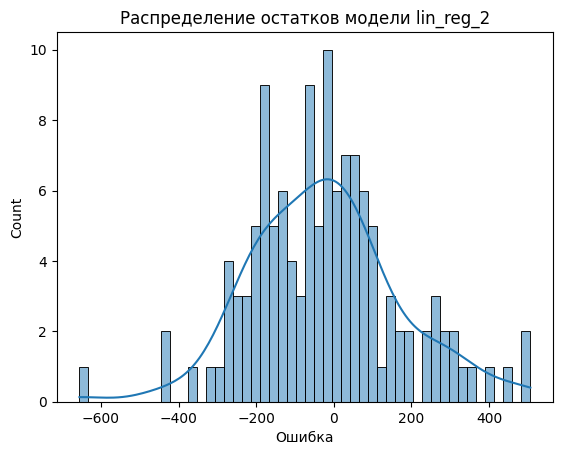

In [1309]:
sns.histplot(
    residuals_2,
    kde=True,
    bins=50
)

plt.title(f'Распределение остатков модели lin_reg_2')
plt.xlabel('Ошибка')

Пик плотности приблизился к 0

Text(0, 0.5, 'Ошибка')

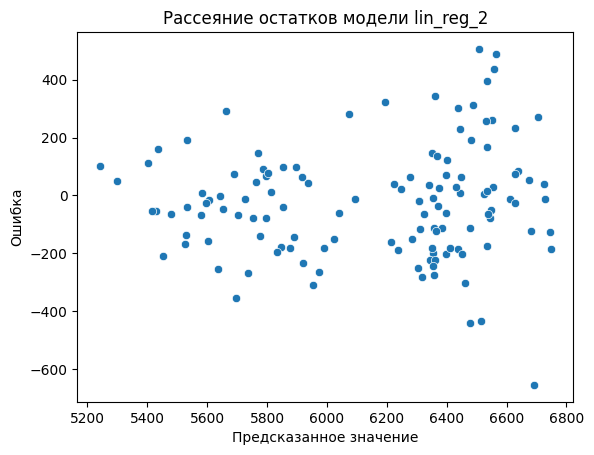

In [1310]:
sns.scatterplot(
    x=predictions_2,
    y=residuals_2
)

plt.title('Рассеяние остатков модели lin_reg_2')
plt.xlabel('Предсказанное значение')
plt.ylabel('Ошибка')

Несмотря на улучшение модели, увеличение ошибок предсказаний высокго удоя > 6000кг не пропало полностью. Видимо, надо изменить входные признаки

#### Промежуточный вывод

Преобразование СПО в бинарный признак и возведение ЭКЕ в квадрат улучшило метрики модели, но не избавило от неравномерности разброса ошибок.

Метрики новой модели:

* MSE: 37073.85
* MAE: 148.19
* RMSE: 192.55
* $\text{R}^2$: 0.82

### Регрессия на данных с учетом связи входных признаков с добавлением информации об отцах

Проведем те же корректировки СПО и ЭКЕ, но не для `data_ferma`, а для `data_ferma_whole`

In [1364]:
new_data_ferma_whole = data_ferma_whole.copy(deep=True)

new_data_ferma_whole['sugar_protein_ratio'] = (
    new_data_ferma_whole
    .loc[:, 'sugar_protein_ratio']
) > 0.91

new_data_ferma_whole['energy_feed_unit_squared'] = (
    new_data_ferma_whole
    .loc[:, 'energy_feed_unit']
) ** 2

new_data_ferma_whole.drop(columns=['energy_feed_unit'], axis=1, inplace=True)

new_data_ferma_whole.head()

,id,milk_yield_kg,crude_protein_g,sugar_protein_ratio,breed,pasture_type,father_breed,fat_percent,protein_percent,milk_taste,age,father_name,energy_feed_unit_squared
0,1,5863,1743,False,вис_бик_айдиал,равнинное,айдиал,3.58,3.076,вкусно,более_2_лет,буйный,201.64
1,2,5529,2138,False,вис_бик_айдиал,равнинное,соверин,3.54,3.079,вкусно,менее_2_лет,соловчик,163.84
2,3,5810,1854,False,рефлешн_соверинг,холмистое,соверин,3.59,3.074,не_вкусно,более_2_лет,барин,196.00
3,4,5895,2012,False,рефлешн_соверинг,холмистое,айдиал,3.40,3.075,не_вкусно,более_2_лет,буйный,153.76
4,5,5302,1675,False,вис_бик_айдиал,равнинное,соверин,3.73,3.073,вкусно,менее_2_лет,барин,163.84


interval columns not set, guessing: ['id', 'milk_yield_kg', 'crude_protein_g', 'fat_percent', 'protein_percent', 'energy_feed_unit_squared']


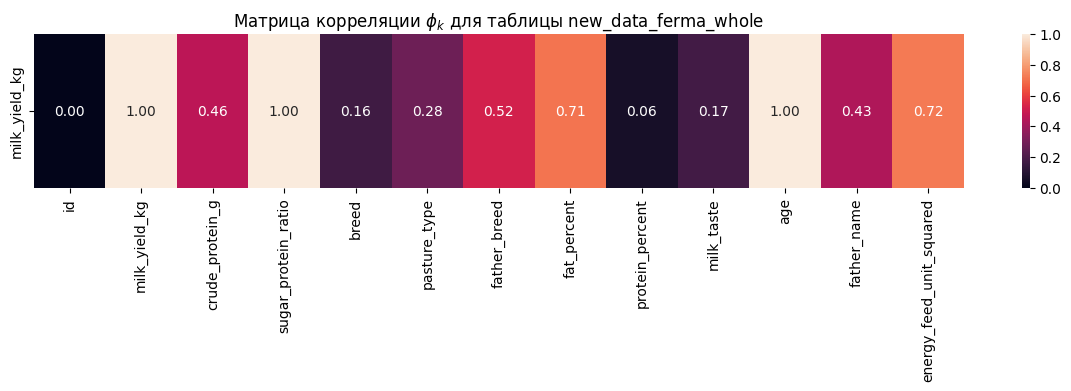

In [1365]:
plt.figure(figsize=(15, 2))
plt.title(r'Матрица корреляции $\phi_k$ для таблицы new_data_ferma_whole')
sns.heatmap(
    new_data_ferma_whole.phik_matrix().loc[['milk_yield_kg']],
    annot=True,
    fmt='.2f'
);

In [1366]:
X_train, X_test, y_train, y_test, transformer_3 = data_preparing(
    (
        new_data_ferma_whole
        .drop(columns=['pasture_type', 'protein_percent', 
                       'milk_taste', 'id'])
    ), 'milk_yield_kg'
    )

Выбор целевого признака
	Целевой признак: milk_yield_kg
	X.shape = (628, 8)
	y.shape = (628,)

Разбиение на тестовую и тренировочную подвыборки

Разбиение на категориальные и количественные признаки
	Категориальных признаков: 5
	Количественных признаков: 3

Преобразование данных
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] ........... (2 of 2) Processing cat, total=   0.0s
После преобразования
	X_train.shape = (502, 10)
	y_train.shape = (502,)


In [1367]:
lin_reg_3 = LinearRegression()

predictions_3 = lin_reg_3.fit(X_train, y_train).predict(X_test)

In [1368]:
print_all_metrics(y_test, predictions_3, is_classification=False)

MSE: 34412.94
MAE: 142.36
RMSE: 185.51
R^2: 0.83


Метрики еще немного улучшились

#### Анализ остатков

In [1369]:
residuals_3 = y_test - predictions_3

Text(0.5, 0, 'Ошибка')

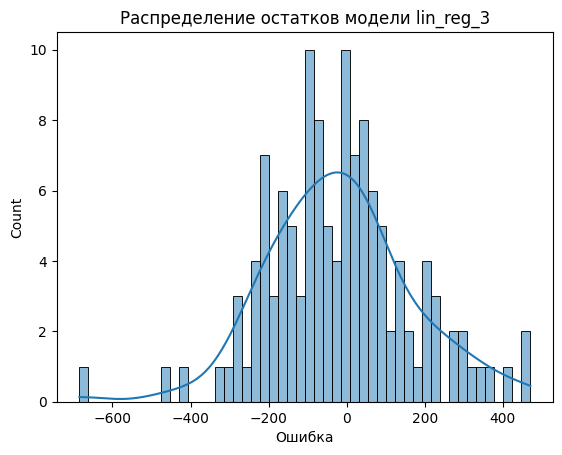

In [1370]:
sns.histplot(
    residuals_3,
    kde=True,
    bins=50
)

plt.title(f'Распределение остатков модели lin_reg_3')
plt.xlabel('Ошибка')

Text(0, 0.5, 'Ошибка')

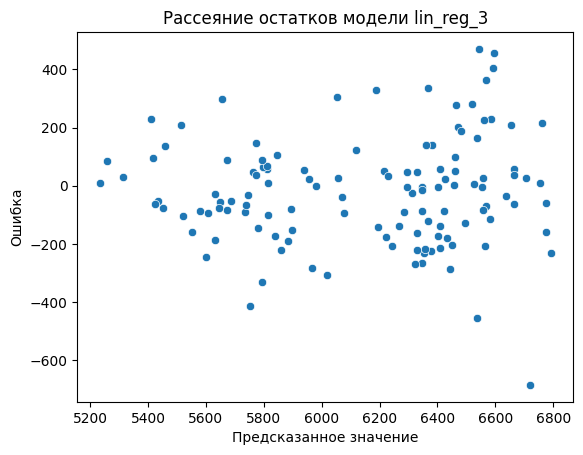

In [1371]:
sns.scatterplot(
    x=predictions_3,
    y=residuals_3
)

plt.title('Рассеяние остатков модели lin_reg_3')
plt.xlabel('Предсказанное значение')
plt.ylabel('Ошибка')

За исключением нескольких выбросов ошибки распределены более или менее равномерно для всех предсказаний

### Доверительный интервал для модели 3

Посчитаем доверительный интервал. Для этого посчитаем 5 и 95 перцентили ошибок

In [1372]:
percentile_95 = np.percentile(residuals_3, 95)
percentile_5 = np.percentile(residuals_3, 5)

print(f'95%-percentile: {percentile_95:.2f}')
print(f'5%-percentile: {percentile_5:.2f}')
print()
print(f'Размер доверительного интервала: {(percentile_95 - percentile_5):.2f}')

95%-percentile: 302.71
5%-percentile: -278.78

Размер доверительного интервала: 581.49


### Коэффициенты модели 3

Посмотрим на посчитанне моделью коэффициенты для признаков

In [1374]:
lin_reg_3.coef_

array([  54.15234316,   24.3473631 ,  148.86671153,  350.8398587 ,
         22.52315353,    9.26273591, -189.94042001,  262.13127608,
        276.63524523,   16.73381653])

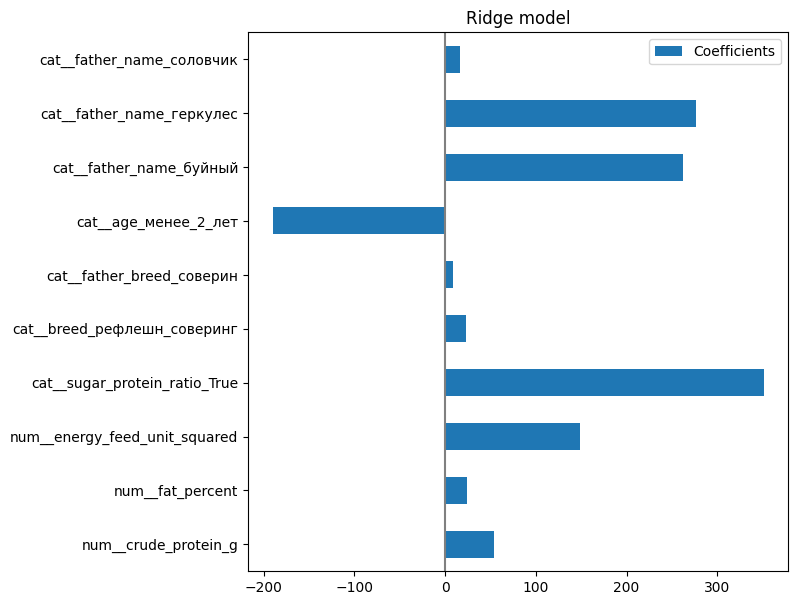

In [1378]:
coefs = pd.DataFrame(
    lin_reg_3.coef_, 
    columns=["Coefficients"], 
    index=transformer_3.get_feature_names_out()
)

coefs.plot(kind="barh", figsize=(9, 7))
plt.title("Ridge model")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

### Вывод

На данных `data_ferma` и `data_ferma_whole` были построены три модели:

* **Модель 1**

В качестве входных признаков из таблицы `data_ferma` были взяты: `energy_feed_unit`, `crude_protein_g`, `sugar_protein_ratio`, `breed`, `father_breed`, `fat_percent`, `age`. Именно эти признаки имели наибольшую корреляцию $\phi_k$.

Метрики модели:

* MSE: 42315.38
* MAE: 159.87
* RMSE: 205.71
* R^2: 0.80

Остатки распределены нормально, но не равномерно по всем предсказаниям - при удое > 6000кг ошибка увеличивалась

* **Модель 2**

Были использованы те же признаки, но СПО (`sugar_protein_ratio`) был преобразован в бинарный признак по принципу больше ли значение 0.91. Также ЭКЕ (`energy_feed_unit`) был возведен в квадрат. Все эти преобразования были направлены на избавления от нелинейности в данных. 

В результате метрики модели немного возрасли:

* MSE: 37073.85
* MAE: 148.19
* RMSE: 192.55
* R^2: 0.82

Колокол распределения остатков стал ближе к 0, распределение по предсказаниям стало более равномерным, но все еще наблюдалась закономерность

* **Модель 3**

Были исплользованы те же преобразованные данные, что использовались в модели 2, но добавился признак `father_name` из таблицы `data_dad`

Добавление нового признака еще улучшило модель:

* MSE: 34412.94
* MAE: 142.36
* RMSE: 185.51
* R^2: 0.83

Теперь ошибки распределены практически равномерно на всех предсказаниях, за исключением нескольких выбросов

* **Общий вывод**

Таким образом, модель 3 показала наилучший результат, как с точки зрений метрик, так и с точки зрения распределения остатков. Для этой модели размер доверительного интервала составил 598кг: 5% ошибок будут меньше -278кг или больше 302кг.

### Прогноз удоя коров, которые фермер хочет купить

Посмотрим на то, какие данные у нас уже есть

In [ ]:
sorted(data_buy.columns)

['age',
 'breed',
 'current_fat_percent',
 'current_protein_percent',
 'father_breed',
 'father_name',
 'pasture_type']

Посмотрим еще раз на то, какие данные подавались при обучении третьей модели

In [ ]:
sorted(
    new_data_ferma_whole
    .drop(columns=['pasture_type', 'protein_percent', 'milk_taste', 'id',
                   'milk_yield_kg'])
    .columns
)

['age',
 'breed',
 'crude_protein_g',
 'energy_feed_unit_squared',
 'fat_percent',
 'father_breed',
 'father_name',
 'sugar_protein_ratio']

У нас не хватает данных: crude_protein_g, energy_feed_unit_squared, sugar_protein_ratio

Возьмем эти данные как среднее из data_ferma, увеличенное на 5%

In [ ]:
new_data_buy = data_buy.copy(deep=True)

In [ ]:
new_data_buy['crude_protein_g'] = (
    data_ferma
    .loc[:, 'crude_protein_g']
    .mean()
) * 1.05

new_data_buy['sugar_protein_ratio'] = (
    data_ferma
    .loc[:, 'sugar_protein_ratio']
    .mean()
) > 0.91

new_data_buy['energy_feed_unit_squared'] = ((
    data_ferma
    .loc[:, 'energy_feed_unit']
    .mean()
) * 1.05) ** 2


И переименуем столбцы:

* `current_fat_percent` -> `fat_percent`

Столбец `current_protein_percent` и `pasture_type` удалим при предобработке

In [ ]:
new_data_buy = (
    new_data_buy
    .rename(columns={'current_fat_percent': 'fat_percent'})
)

Теперь можем предобработать данные так, как мы делали для 3 модели

In [ ]:
X_buy = transformer_3.transform(new_data_buy)

И, используя 3 модель, предскажем удой коров на покупку

In [ ]:
predictions_buy = lin_reg_3.predict(X_buy)

Text(0.5, 0, 'Удой, кг')

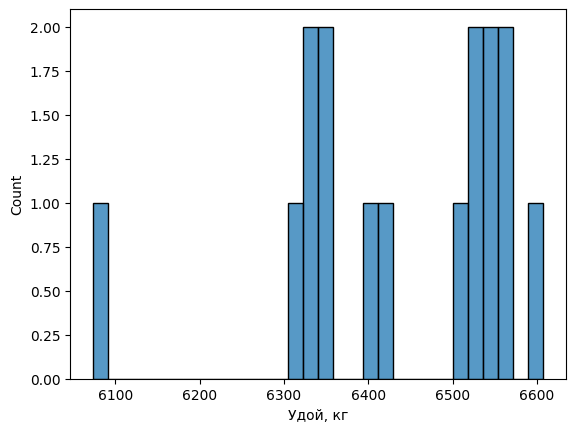

In [ ]:
sns.histplot(
    predictions_buy,
    bins=30
)

plt.xlabel('Удой, кг')

Добавим предсказание в data_buy

In [ ]:
data_buy['milk_yield_kg'] = predictions_buy

## Обучение модели логистической регрессии

### Логистическая регрессия для предсказания вкуса молока

Сначала выберем признаки, которые сильнее всего коррелируют со вкусом молока

interval columns not set, guessing: ['id', 'milk_yield_kg', 'energy_feed_unit', 'crude_protein_g', 'sugar_protein_ratio', 'fat_percent', 'protein_percent']


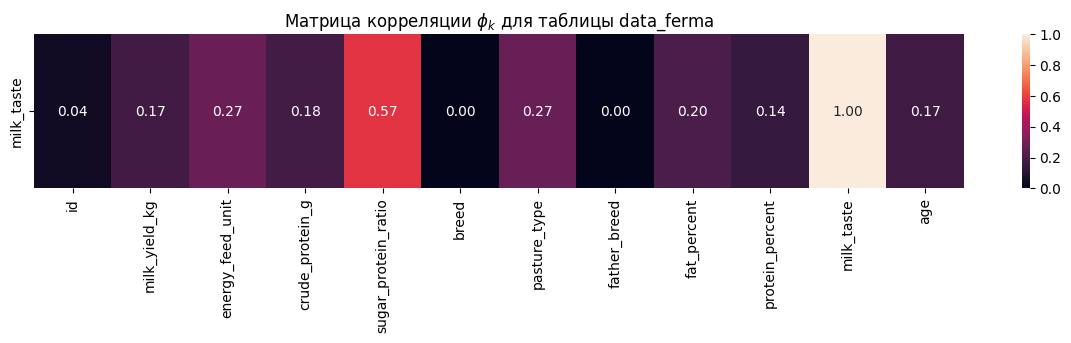

In [ ]:
plt.figure(figsize=(15, 2))
plt.title(r'Матрица корреляции $\phi_k$ для таблицы data_ferma')
sns.heatmap(
    data_ferma.phik_matrix().loc[['milk_taste']],
    annot=True,
    fmt='.2f'
);

Возьмем все характеристики, за исключением id, breed, father_breed. Остальные характеристики либо имеют высокий коэффициент корреляции, либо должны иметь связь из практических соображений

In [ ]:
log_data_ferma_1 = data_ferma.drop(
    columns=['id', 'breed', 'father_breed'],
    axis=1
)

In [ ]:
# log_data_ferma_1 = data_ferma.loc[:, [
#     'age',
#     'breed',
#     'fat_percent',
#     'protein_percent',
#     'milk_yield_kg',
#     'pasture_type',
#     'milk_taste'
#  ]]

Предобработаем данные

In [ ]:
X_train, X_test, y_train, y_test, transformer_log = data_preparing(
    (
        log_data_ferma_1
    ), 'milk_taste'
    )

Выбор целевого признака
	Целевой признак: milk_taste
	X.shape = (628, 8)
	y.shape = (628,)

Разбиение на тестовую и тренировочную подвыборки

Разбиение на категориальные и количественные признаки
	Категориальных признаков: 2
	Количественных признаков: 6

Преобразование данных
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] ........... (2 of 2) Processing cat, total=   0.0s
После преобразования
	X_train.shape = (502, 8)
	y_train.shape = (502,)


Создадим объект и обучим модель

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg_1 = LogisticRegression()

y_train_binary = [1 if i == 'вкусно' else 0 for i in y_train]

log_reg_1.fit(X_train, y_train_binary)

predictions_log_1 = log_reg_1.predict(X_test)

Выведем метрики

In [ ]:
y_test_binary = [1 if i == 'вкусно' else 0 for i in y_test]

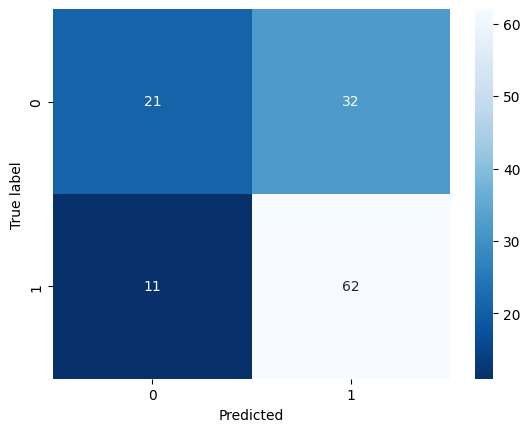

Accuracy: 0.66
Precision: 0.66
Recall: 0.85


In [ ]:
print_all_metrics(
    y_test_binary, 
    predictions_log_1, 
    is_classification=True
)

Модель угадывает только 66%. При этом фермеру нужно вкусное молоко, то есть более критичными являются ошибки второго рода, когда модель такое молоко отвергает. То есть нужно повышать recall

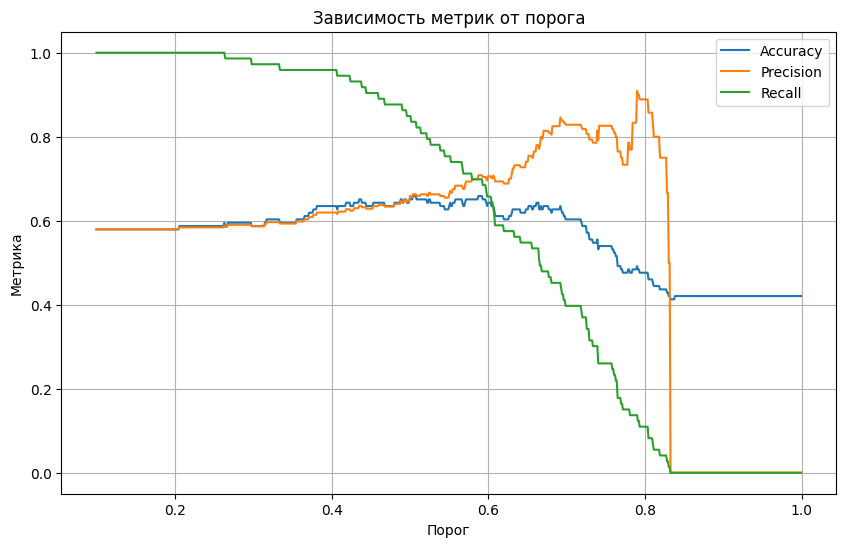

In [ ]:
# Вероятность того, что молоко вкусное
y_test_proba = log_reg_1.predict_proba(X_test)[:, 1]

thresholds = np.linspace(0.1, 1, num=800, endpoint=False)

accuracy_scores = []
precision_scores = []
recall_scores = []

for threshhold in thresholds:
    y_pred = (y_test_proba > threshhold).astype('int')  
    accuracy_scores.append(accuracy_score(y_test_binary, y_pred))
    precision_scores.append(precision_score(y_test_binary, y_pred, zero_division=0))
    recall_scores.append(recall_score(y_test_binary, y_pred))

accuracy_scores = np.array(accuracy_scores)
precision_scores = np.array(precision_scores)
recall_scores = np.array(recall_scores)

plt.figure(figsize=(10, 6))
plt.plot(thresholds, accuracy_scores, label='Accuracy')
plt.plot(thresholds, precision_scores, label='Precision')
plt.plot(thresholds, recall_scores, label='Recall')

plt.title('Зависимость метрик от порога')
plt.xlabel('Порог')
plt.ylabel('Метрика')
plt.legend()
plt.grid(True)
plt.legend()
plt.show();

Вся оценка порогов еще раз доказала, что если главное для фермера - это получить вкусное молоко, то ему следует просто покупать всех коров

Если все-таки фермеру нельзя купить корову с невкусным молоком (что больше похоже на реальность), то нужно максимизировать precision. Посмотрим при каком пороге достигается максимум

In [ ]:
thresholds[precision_scores.argmax()]

np.float64(0.789625)

При этом остальные метрики

In [ ]:
print(f'Accuracy: {accuracy_scores[precision_scores.argmax()]}')
print(f'Recall: {recall_scores[precision_scores.argmax()]}')

Accuracy: 0.49206349206349204
Recall: 0.136986301369863


### Предсказание вкуса молока коров покупки

Посмотрим какие данные использовались для нашей модели

In [ ]:
sorted(
    log_data_ferma_1
    .columns
)

['age',
 'crude_protein_g',
 'energy_feed_unit',
 'fat_percent',
 'milk_taste',
 'milk_yield_kg',
 'pasture_type',
 'protein_percent',
 'sugar_protein_ratio']

Посмотрим какие данные есть в таблице `data_buy`

In [ ]:
sorted(data_buy.columns)

['age',
 'breed',
 'current_fat_percent',
 'current_protein_percent',
 'father_breed',
 'father_name',
 'milk_yield_kg',
 'pasture_type']

Изменим названия столбцов: 

* `current_fat_percent` -> `fat_percent`
* `current_protein_percent` -> `protein_percent`

`crude_protein_g`, `energy_feed_unit`, `sugar_protein_ratio` возьмем как 105% от среднего в `data_ferma`

`milk_yield_kg` возьмем как результат предсказания линейной регрессии, полученный ранее



In [ ]:
data_buy_log = (
    data_buy.
    drop(columns=['breed', 'father_breed', 'father_name'])
    .copy(deep=True)
)

data_buy_log.rename(
    columns={
        'current_fat_percent': 'fat_percent',
        'current_protein_percent': 'protein_percent'
    }, inplace=True
)

data_buy_log['energy_feed_unit'] = (
    data_ferma
    .energy_feed_unit
    .mean()
) * 1.05

data_buy_log['crude_protein_g'] = (
    data_ferma
    .crude_protein_g
    .mean()
) * 1.05

data_buy_log['sugar_protein_ratio'] = (
    data_ferma
    .sugar_protein_ratio
    .mean()
) * 1.05

Преобразуем, используя предобученный трансформер

In [ ]:
X_buy_log = transformer_log.transform(data_buy_log)

Предскажем

In [ ]:
predictions_buy_log = (
    log_reg_1.predict_proba(X_buy_log)[:, 1] > thresholds[precision_scores.argmax()]
).astype('int')

In [ ]:
predictions_buy_log

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0])

Добавим данные к таблице

In [ ]:
data_buy['milk_taste'] = np.array(['вкусно' if i == 1 else 'не вкусно' for i in predictions_buy_log])

In [ ]:
data_buy['milk_yield_kg']

0     6553.926962
1     6352.860343
2     6310.548847
3     6535.463804
4     6570.773594
5     6403.128637
6     6547.214487
7     6345.523384
8     6325.356888
9     6607.781470
10    6568.639374
11    6073.074172
12    6535.463804
13    6325.356888
14    6423.726015
15    6513.375939
Name: milk_yield_kg, dtype: float64

## Итоговые выводы

Найдем коров, у которых вкусное молоко и удой > 6000кг

In [ ]:
data_buy.query('milk_yield_kg > 6000 and milk_taste == "вкусно"')

,breed,pasture_type,father_breed,father_name,current_fat_percent,current_protein_percent,age,milk_yield_kg,milk_taste
7,рефлешн_соверинг,холмистое,айдиал,буйный,3.40,3.079,менее_2_лет,6345.523384,вкусно
11,вис_бик_айдиал,холмистое,соверин,барин,3.42,3.075,менее_2_лет,6073.074172,вкусно
13,вис_бик_айдиал,холмистое,соверин,соловчик,3.73,3.079,более_2_лет,6325.356888,вкусно


* Подготовка данных и предсказания
Модели были обучены на данных из `data_ferma` и `data_ferma_whole`, включающих такие признаки, как возраст коров, тип пастбища, процент жира, процент белка, единицы энергетического корма, соотношение сахара и белка, порода и имя отца. Для новых коров (`data_buy`) были предсказаны удой и вкус молока.

* **Линейная регрессия для предсказания удоя**: Использовалась для предсказания `milk_yield_kg`. Модель прошла несколько итераций:
  - Первая модель: $\text{R}^2$ = 0.80, MSE = 42315.38, MAE = 159.87, RMSE = 205.71.
  - Вторая модель: Улучшена за счет бинаризации соотношения сахара и белка (>0,91) и возведения в квадрат единиц энергетического корма; $\text{R}^2$ = 0.82, MSE = 37073.85, MAE = 148.19, RMSE = 192.55.
  - Третья модель: Добавлен признак `father_name`, $\text{R}^2$ = 0.83, MSE = 34412.94, MAE = 142.36, RMSE = 185.51. Остаточные ошибки были более равномерно распределены, с интервалом доверия от -278 кг до 302 кг (размер интервала 581 кг).
- Для `data_buy` отсутствующие признаки (`crude_protein_g`, `energy_feed_unit`, `sugar_protein_ratio`) были заполнены как 105% от средних значений из `data_ferma`. Предсказания удоя для 16 коров варьировались от 6073 кг до 6607 кг.

* **Логистическая регрессия для предсказания вкуса молока**: Использовалась для классификации молока как "вкусно" или "не вкусно". Модель обучалась на бинаризованных данных (1 — "вкусно", 0 — "не вкусно"), с метриками на тестовом наборе: точность 0.66, точность (precision) 0.66, полнота (recall) 0.85. Для минимизации ложных срабатываний (предсказание "вкусно", когда молоко не вкусно) порог вероятности был увеличен до 0.789625, что снизило полноту до 0.136986 и точность до 0.492063, но повысило точность предсказаний "вкусно".

* Выбор коров для покупки
После добавления предсказаний в датафрейм `data_buy`, были отобраны коровы с предсказанным удоем более 6000 кг и вкусным молоком: индексы 7, 11, 13

Таким образом, из 16 коров только 3 соответствуют критериям. Столь малый выход согласуется с тем, что целью модели стояла минимизация ошибок первого рода.

* Дополнительные рекомендации
Фермеру рекомендуется:
1. Рассмотреть доверительные интервалы предсказаний удоя.
2. Изучить коэффициенты модели или важность признаков, чтобы понять, какие факторы (например, порода отца, возраст) наиболее влияют на удой и вкус, что может помочь в будущих покупках.
3. Собрать больше данных, особенно для коров с высоким удоем, чтобы улучшить точность моделей.
4. Рассмотреть использование более сложных моделей, таких как случайный лес или градиентный бустинг, для учета нелинейных зависимостей.

* Выводы о моделях
- **Линейная регрессия**: Эффективна для предсказания удоя, с улучшениями за счет инженерии признаков (бинаризация соотношения сахара и белка, возведение в квадрат единиц энергетического корма). Метрики улучшились с каждой итерацией, достигнув R² 0,83.
- **Логистическая регрессия**: Ключевым моментом было изменение порога для повышения точности, что важно для минимизации рисков. Метрики включали точность 0,66, полноту 0,85 на исходном пороге, но с увеличением порога до 0,789625 точность повысилась за счет снижения полноты.

* Важные метрики моделей классификации
Для анализа рисков и экономических расчетов важны следующие метрики:
- **Точность (Precision)**: Критична, когда стоимость ложных срабатываний высока, как в данном случае, чтобы избежать покупки коров с невкусным молоком.
- **Полнота (Recall)**: Важна, если упущение истинных положительных случаев дорого, но в данном сценарии точность была приоритетной.
- **F1-Score**: Баланс между точностью и полнотой, полезен для общего понимания.
- **ROC-AUC**: Оценивает способность модели различать классы на разных порогах.
- **Матрица ошибок (Confusion Matrix)**: Помогает понять типы ошибок модели, что важно для управления рисками.